In [2]:
%matplotlib inline

import os 
import sys 
import time
import hashlib

from datetime  import datetime 

import numpy as np  # learn 
import pandas as pd # learn
from pandas import *
from numpy import *

from scipy import stats # look at scipy
from scipy import linalg
from scipy import *
 
import matplotlib as mplt # learn matplolib 
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# import seaborn as sns 
# sns.set_style("whitegrid")
# sns.set(rc={"figure.figsize": (14, 6)})

import IPython
from IPython.display import display


import matplotlib
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
 
# import sklearn as sk
import itertools

# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SQLContext
# from pyspark.sql.types import *
# from pyspark.mllib.regression import LabeledPoint

from keras.models import Sequential 
from keras.layers.core import Dense, Activation, TimeDistributedDense, Dropout
from keras.layers.recurrent import LSTM
from keras.optimizers import *
# RMSprop, Adadelta
from keras.regularizers import l2, activity_l2

import scipy.stats as st

# http://sebastianruder.com/optimizing-gradient-descent/
# https://leemendelowitz.github.io/blog/how-does-python-find-packages.html

Using Theano backend.


size of noisy data: (1420, 3)
size of noisy data: (1439, 3)
size of noisy data: (1461, 3)
size of noisy data: (1423, 3)
size of noisy data: (1439, 3)
size of noisy data: (1439, 3)
size of noisy data: (1423, 3)
size of noisy data: (1420, 3)
size of noisy data: (1461, 3)
size of noisy data: (1439, 3)
size of noisy data: (1439, 3)
size of noisy data: (1439, 3)
size of noisy data: (1439, 3)
size of noisy data: (1439, 3)
size of noisy data: (1439, 3)
size of noisy data: (1461, 3)
size of noisy data: (1424, 3)
size of noisy data: (1461, 3)
size of noisy data: (1424, 3)
size of noisy data: (1422, 3)
size of noisy data: (1420, 3)
size of noisy data: (1420, 3)
size of noisy data: (1420, 3)
size of noisy data: (1461, 3)
size of noisy data: (1435, 3)
size of noisy data: (1435, 3)
size of noisy data: (1427, 3)
size of noisy data: (1441, 3)
size of noisy data: (1441, 3)
size of noisy data: (1461, 3)
size of noisy data: (1427, 3)
size of noisy data: (1427, 3)
size of noisy data: (1439, 3)
size of no

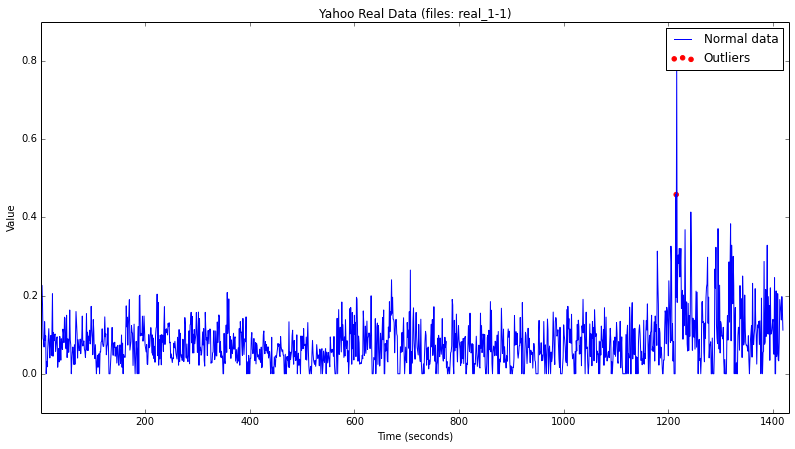

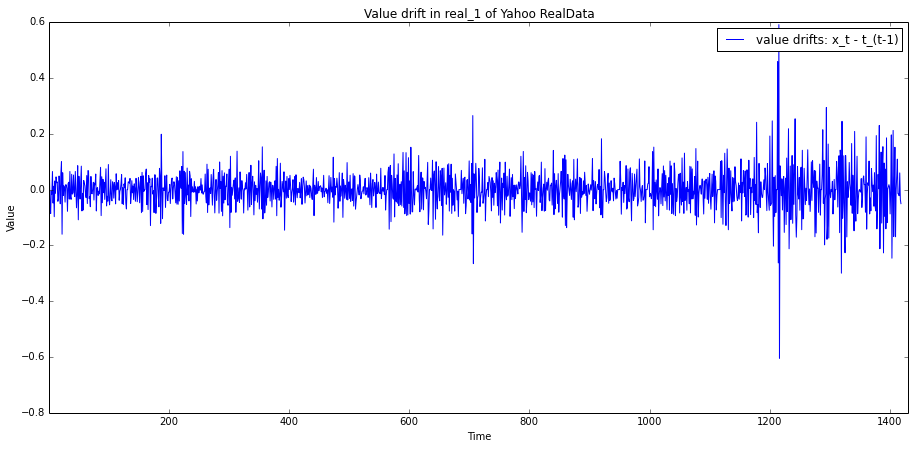

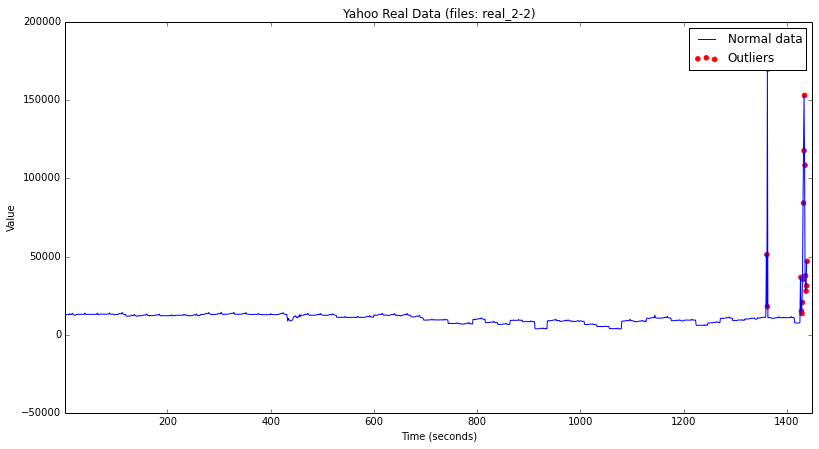

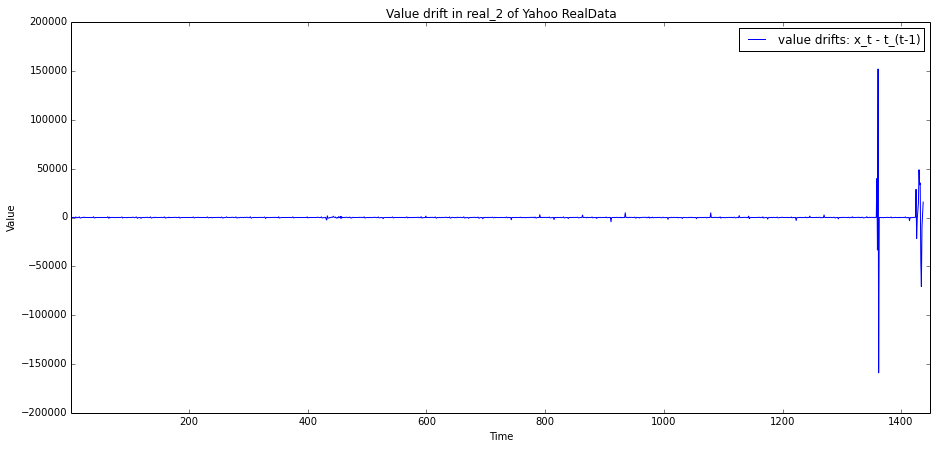

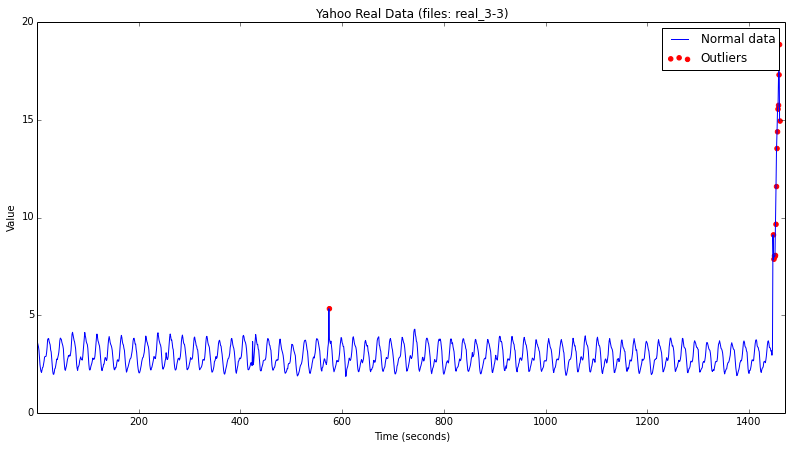

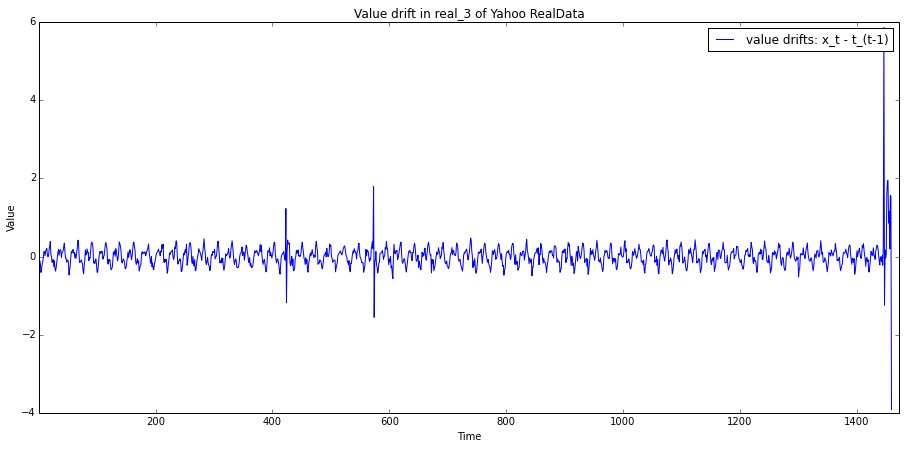

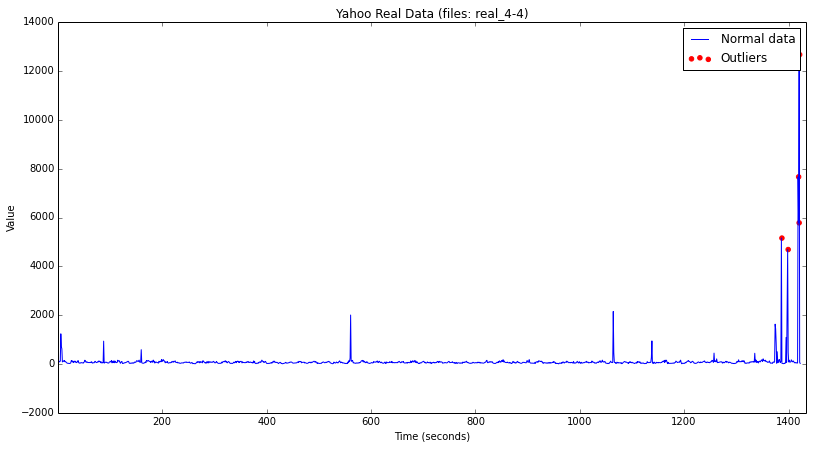

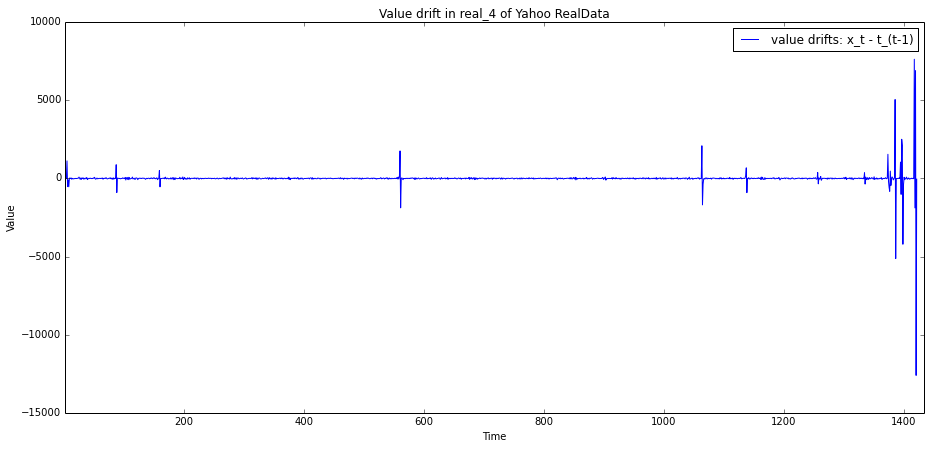

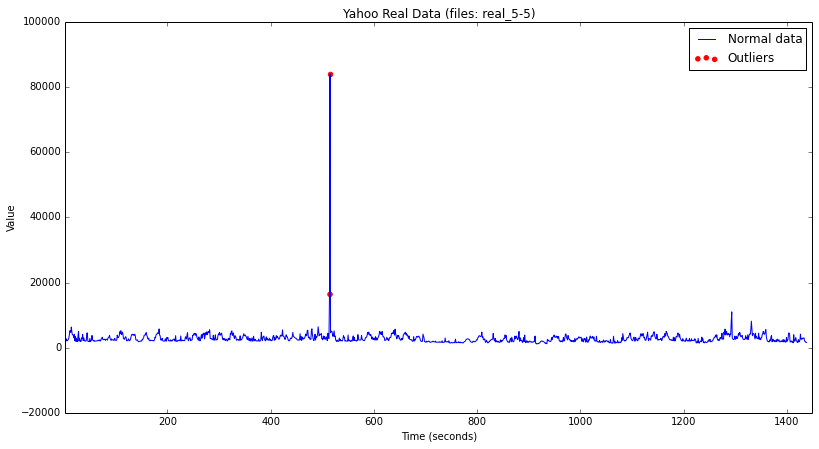

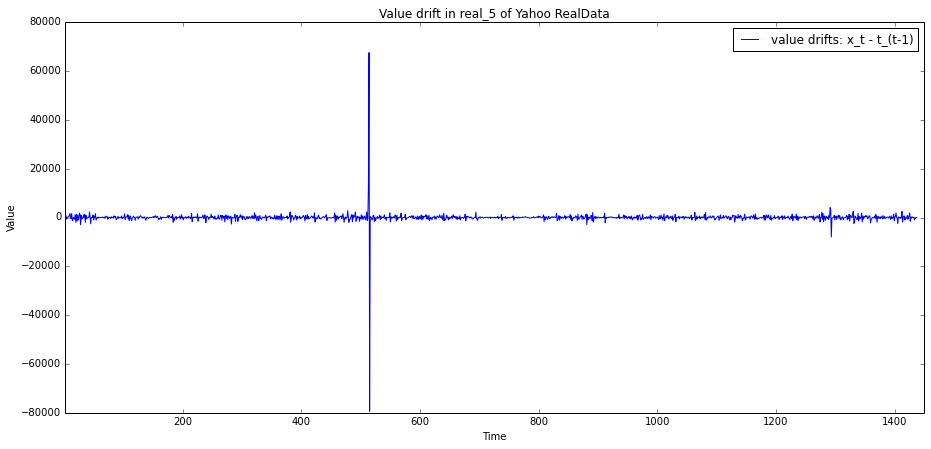

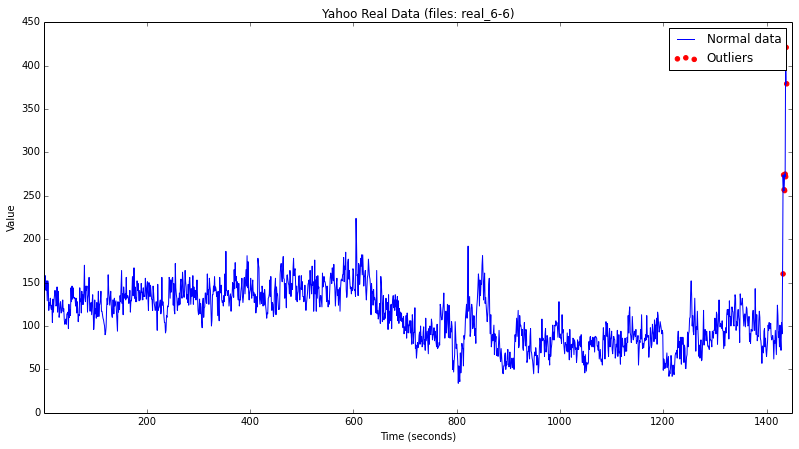

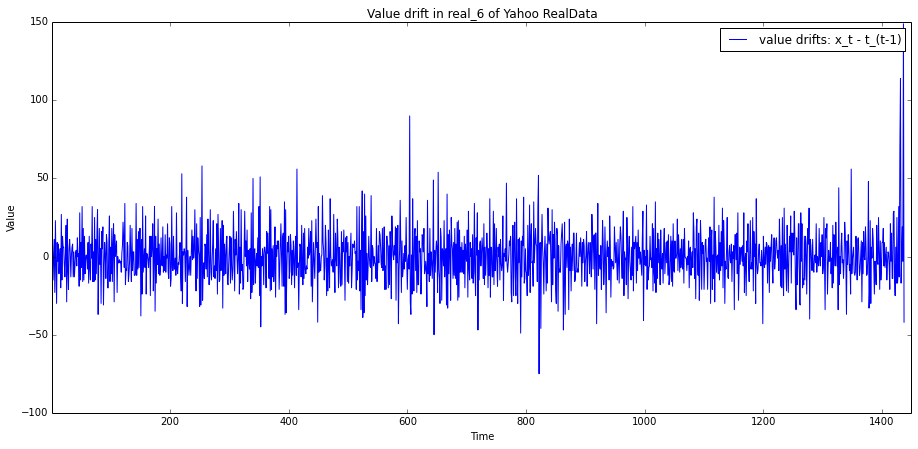

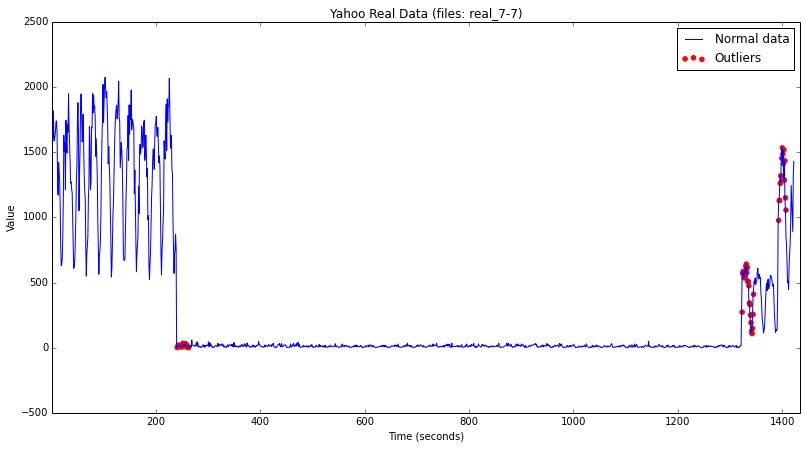

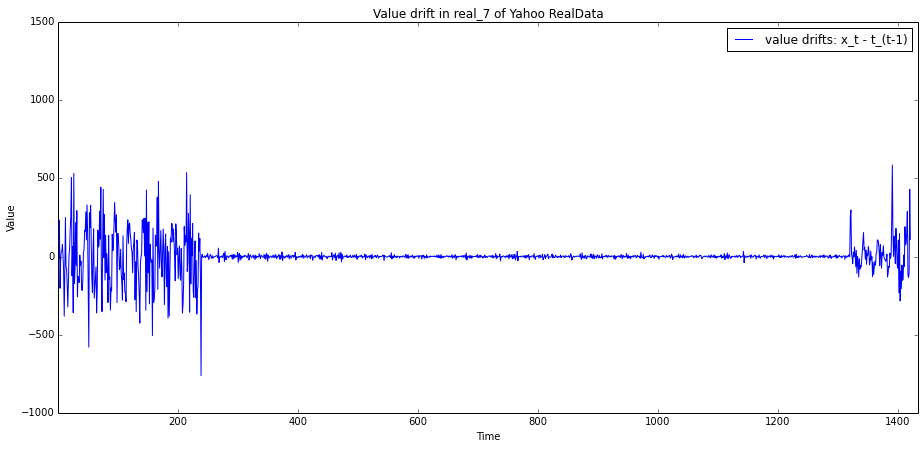

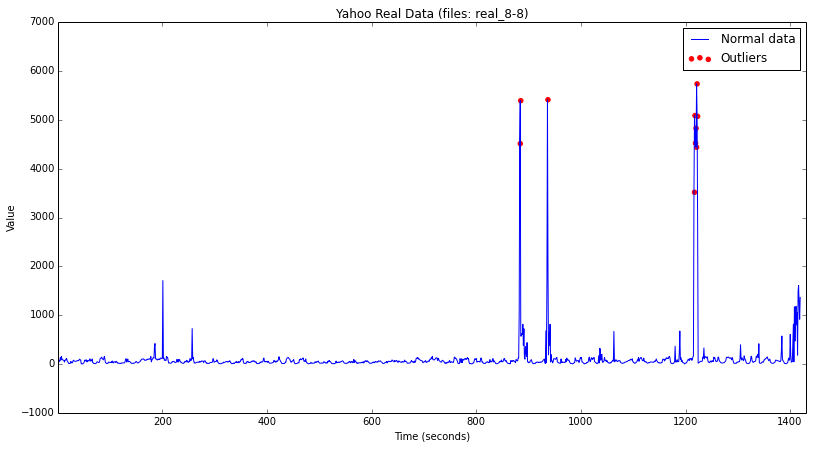

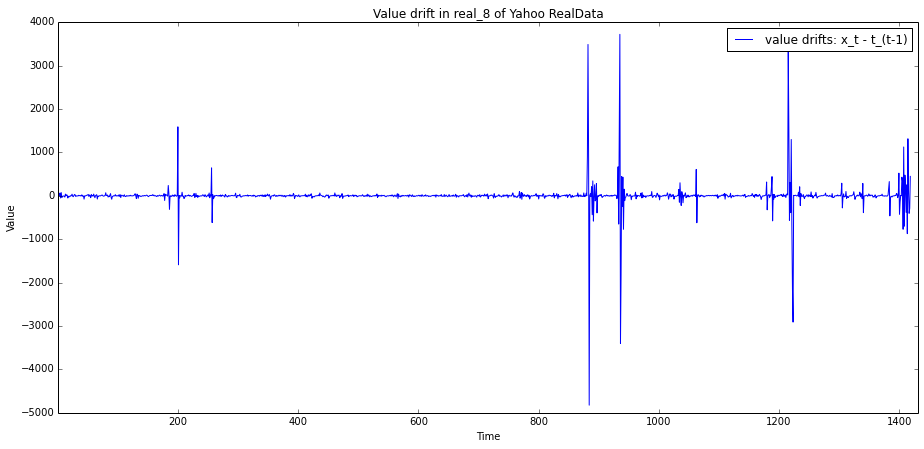

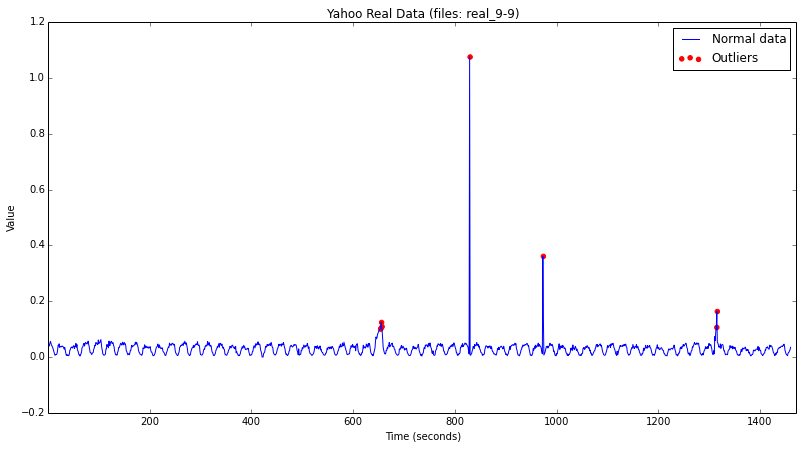

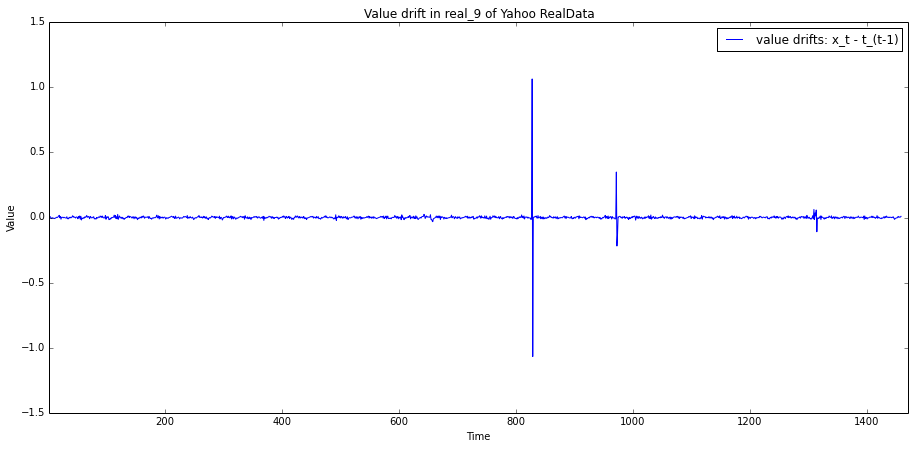

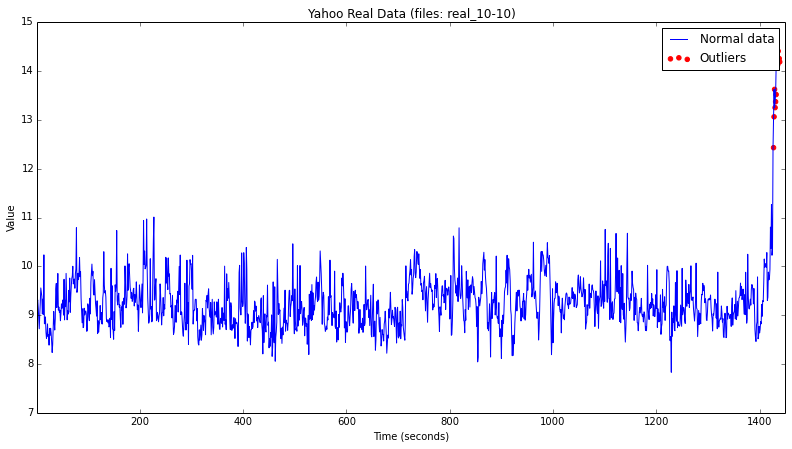

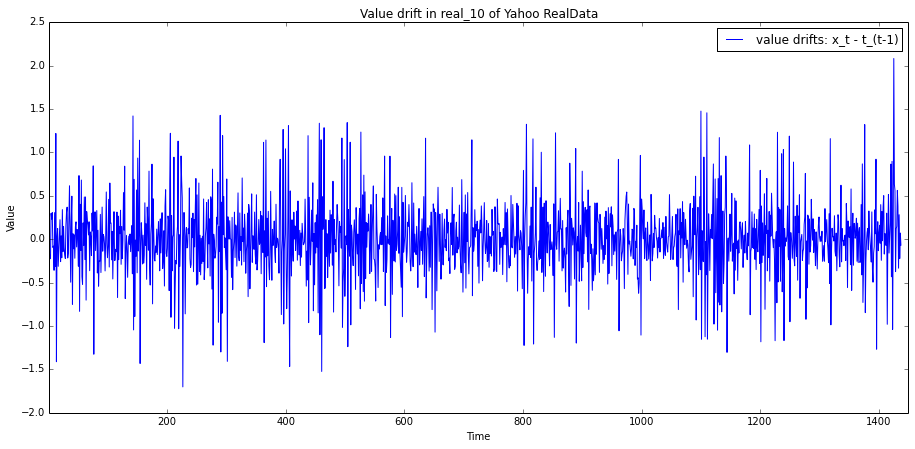

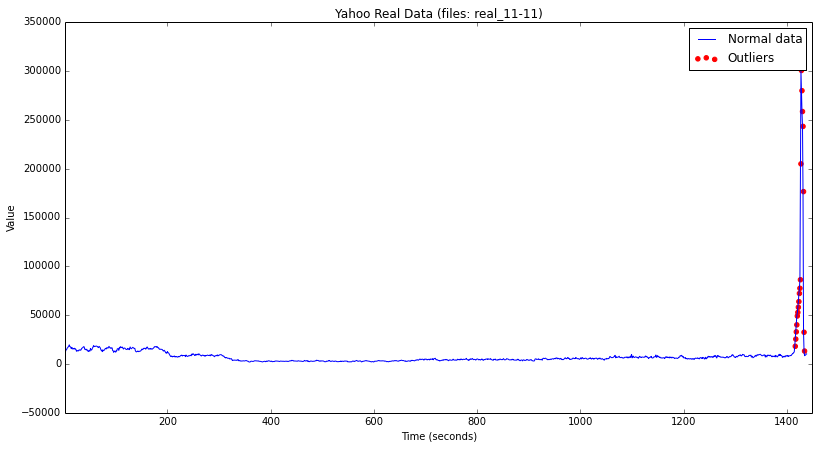

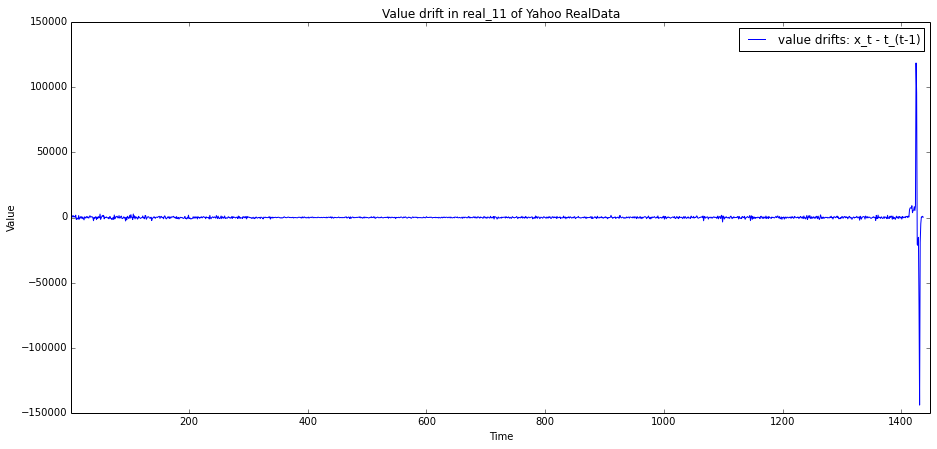

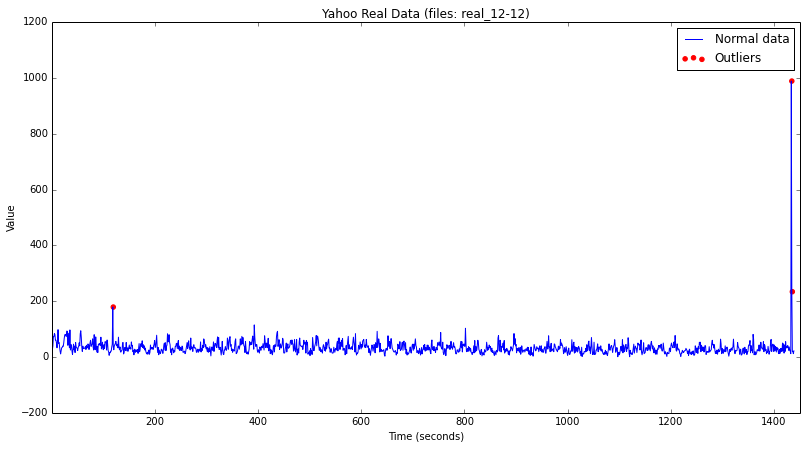

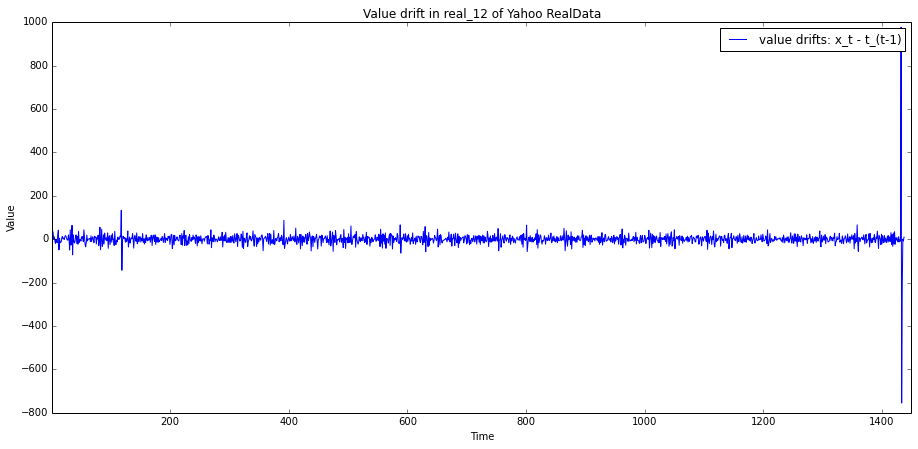

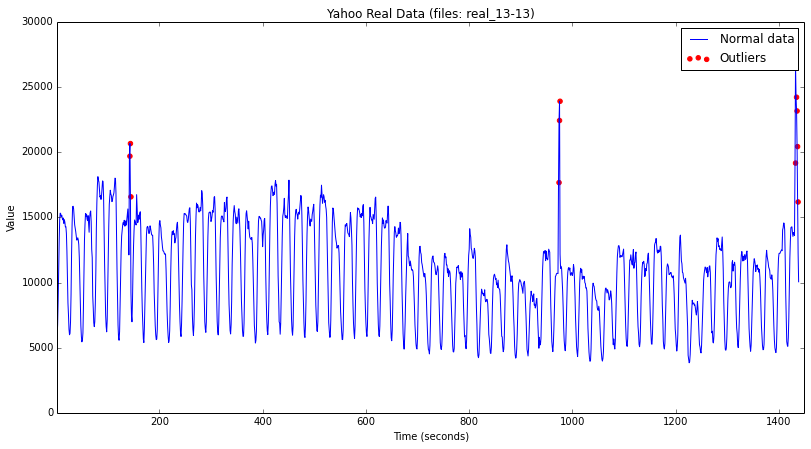

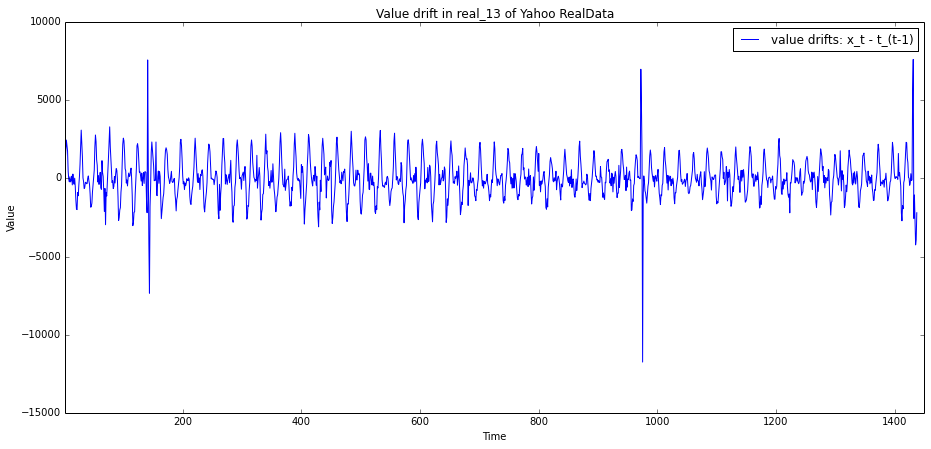

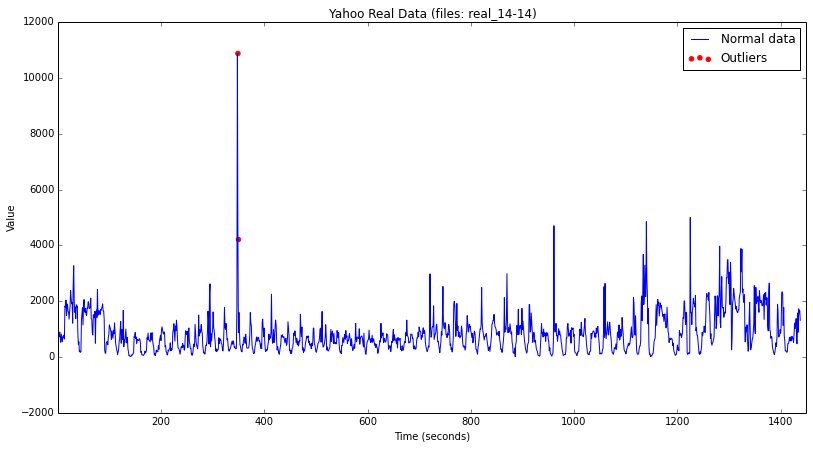

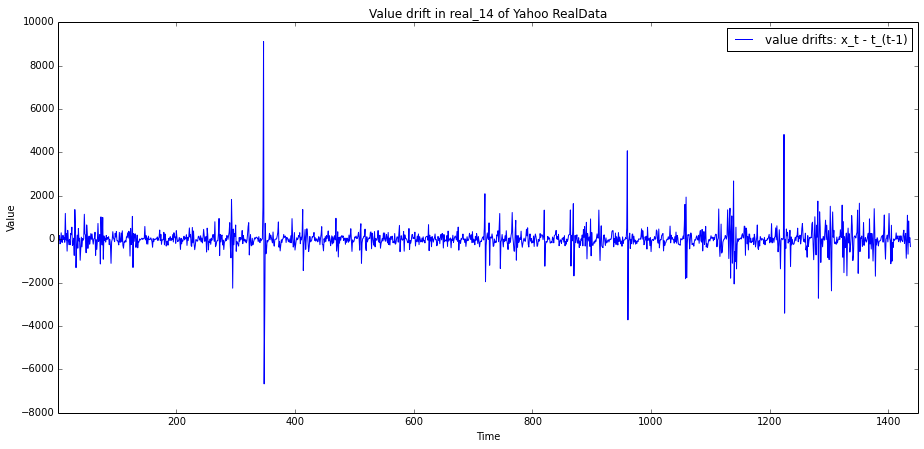

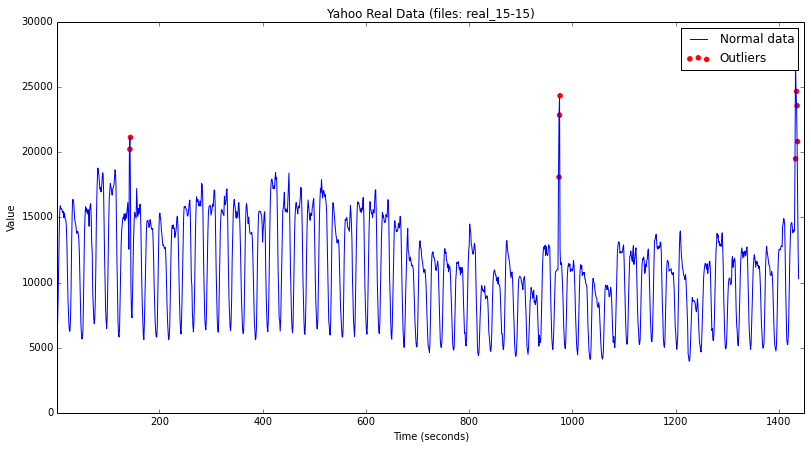

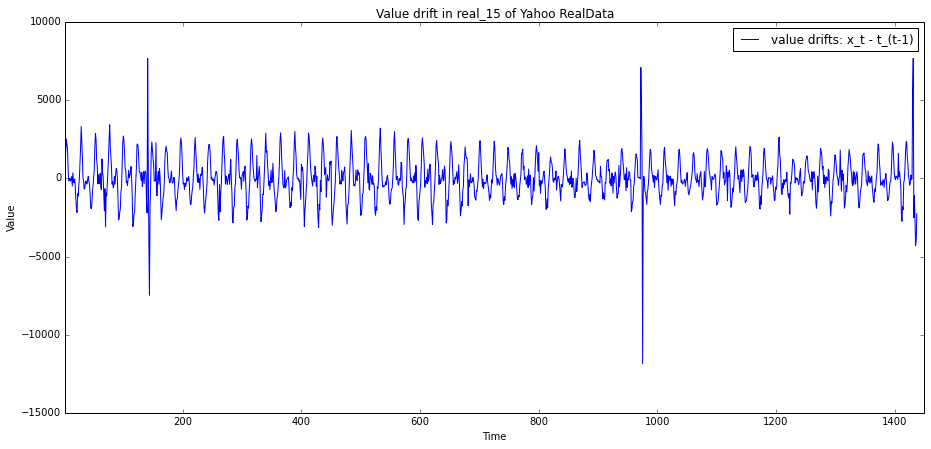

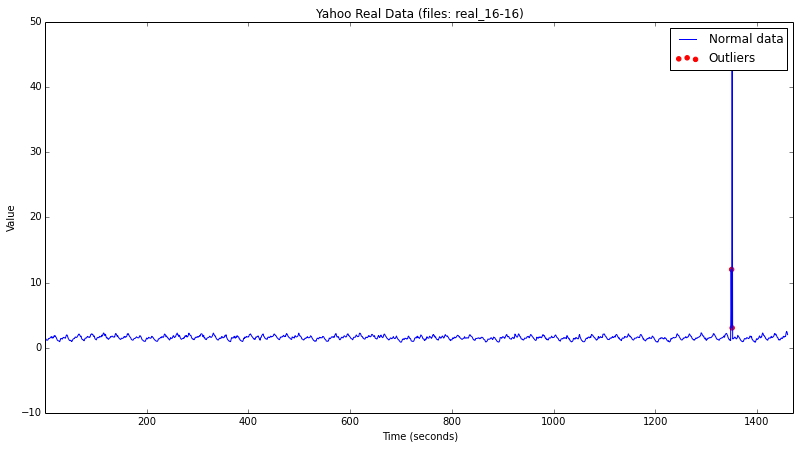

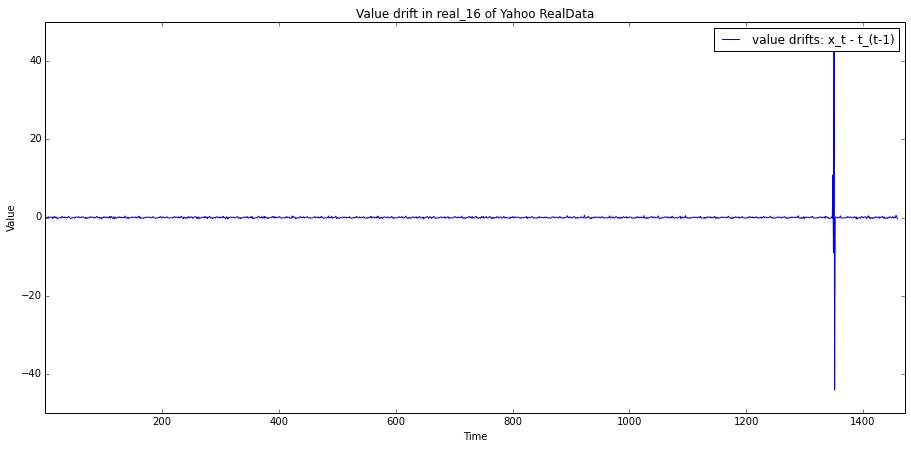

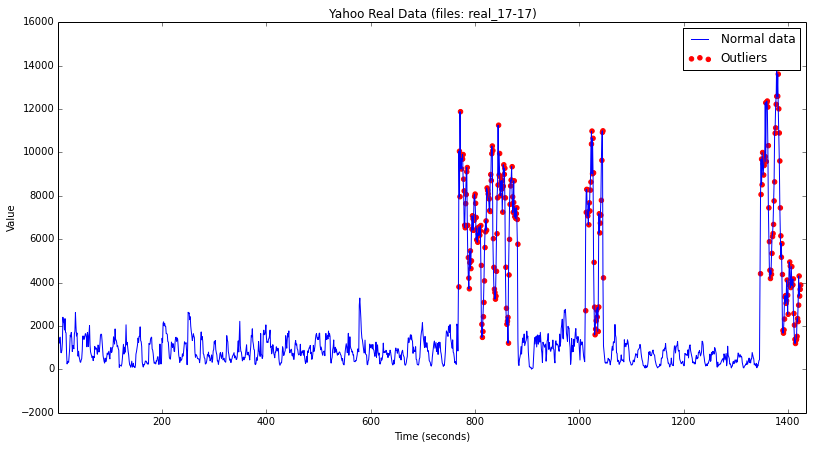

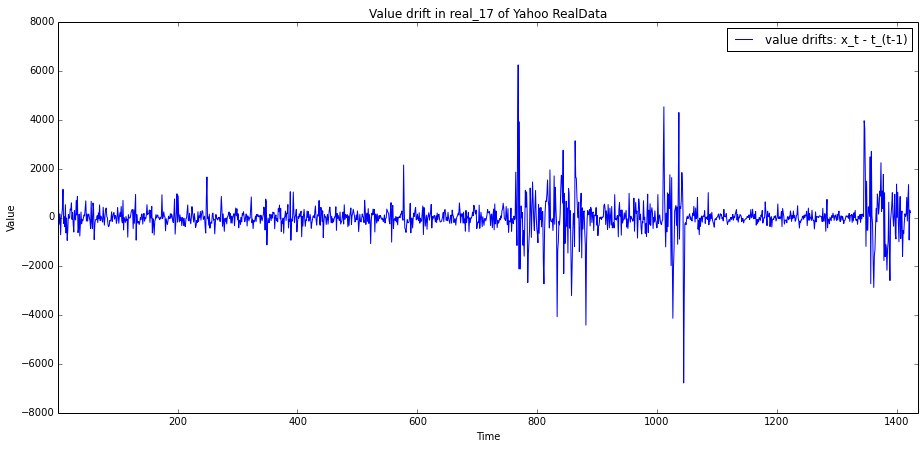

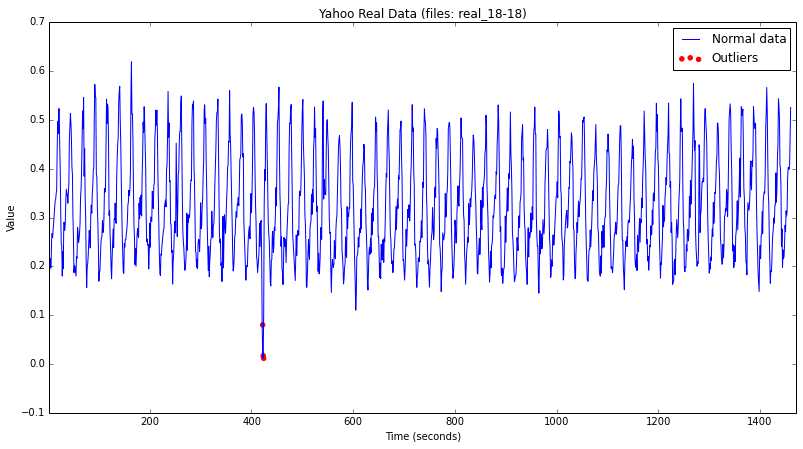

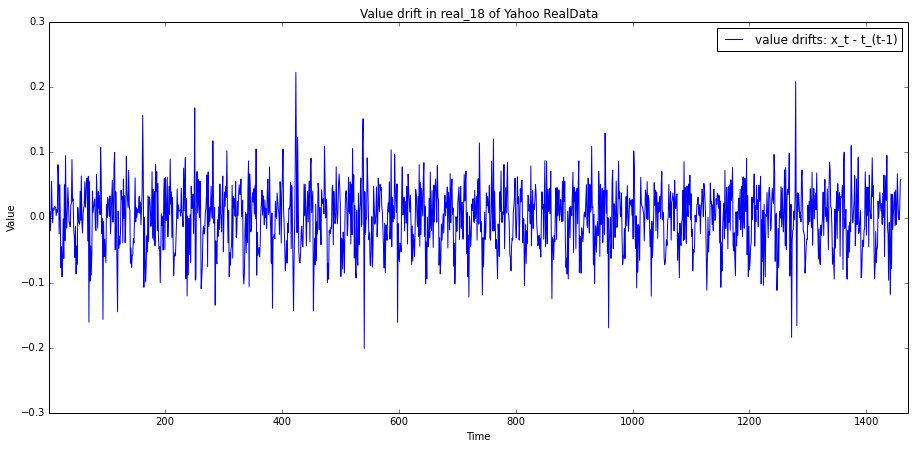

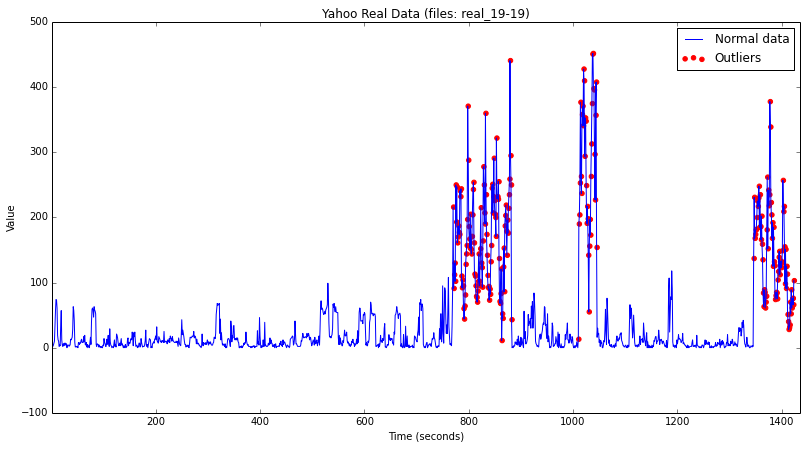

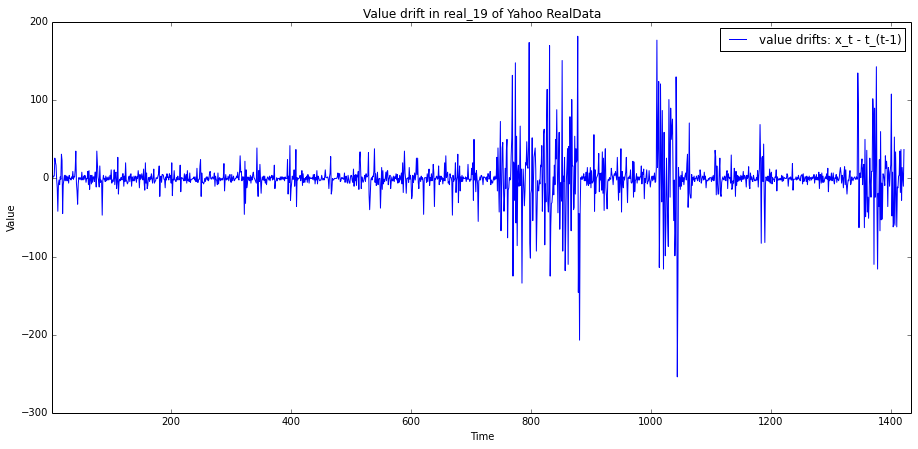

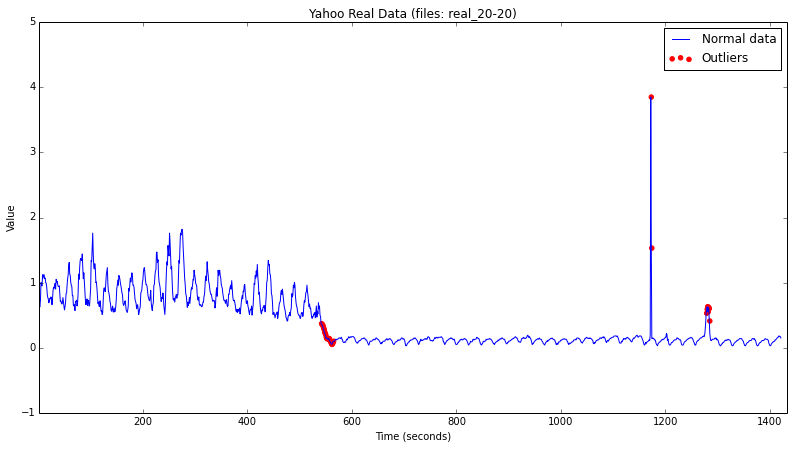

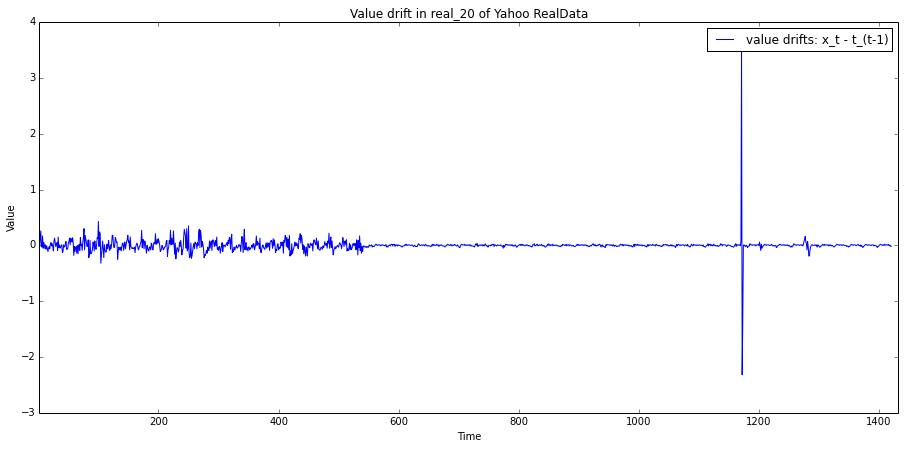

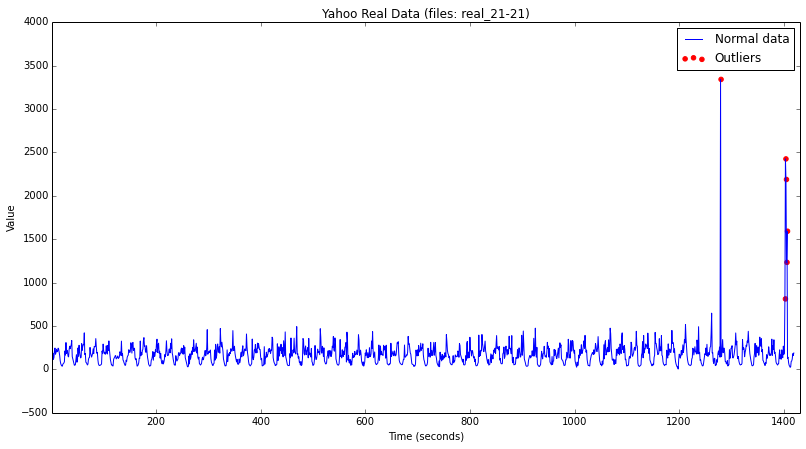

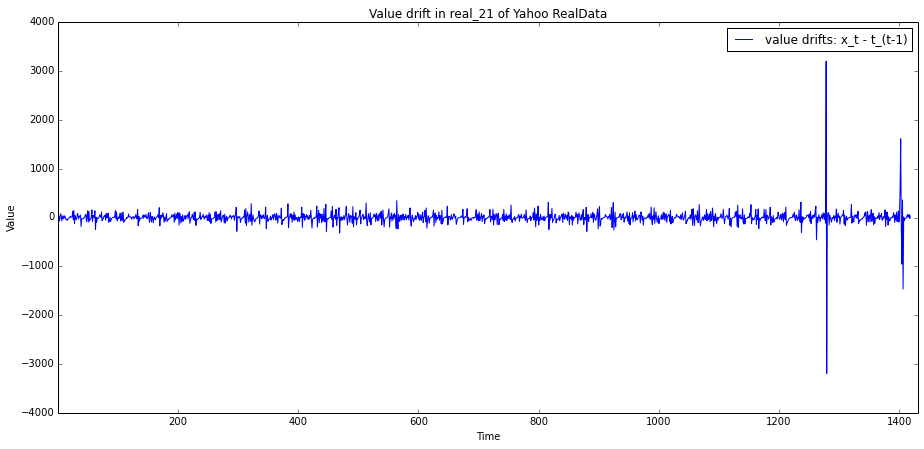

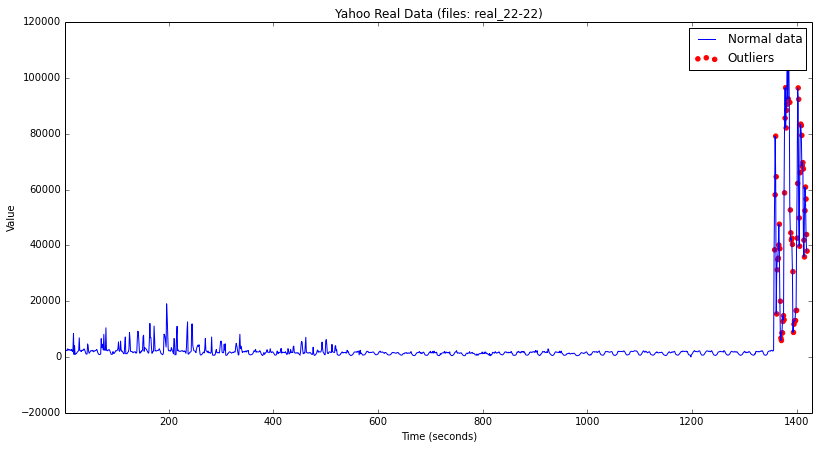

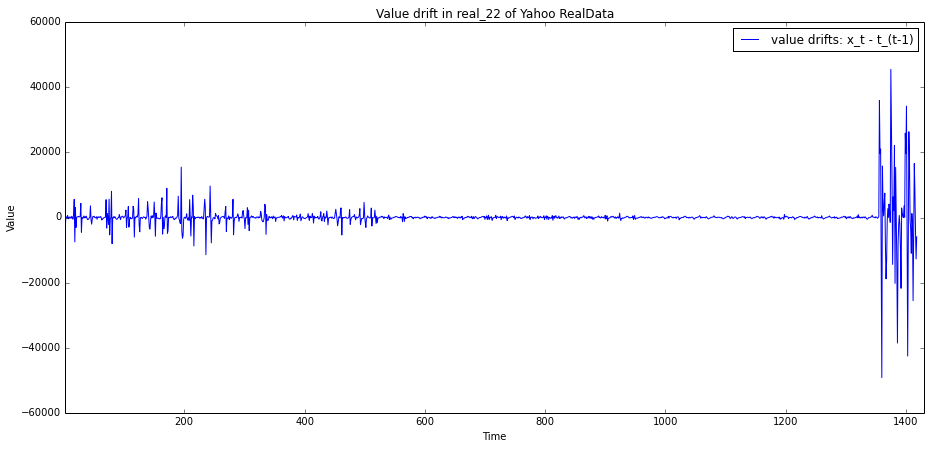

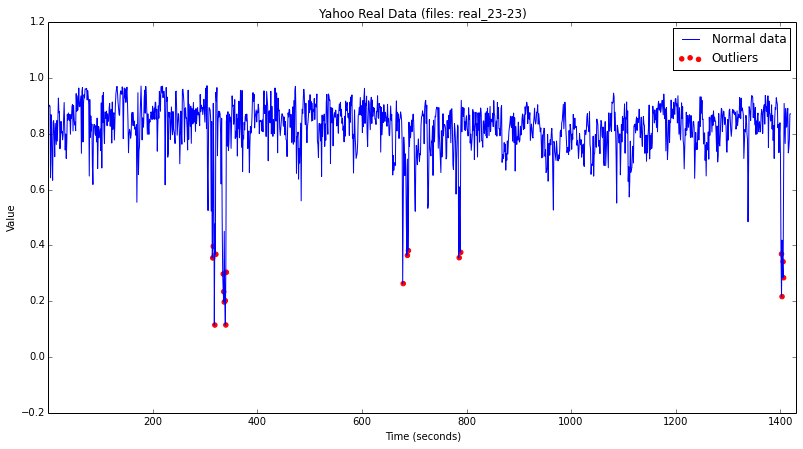

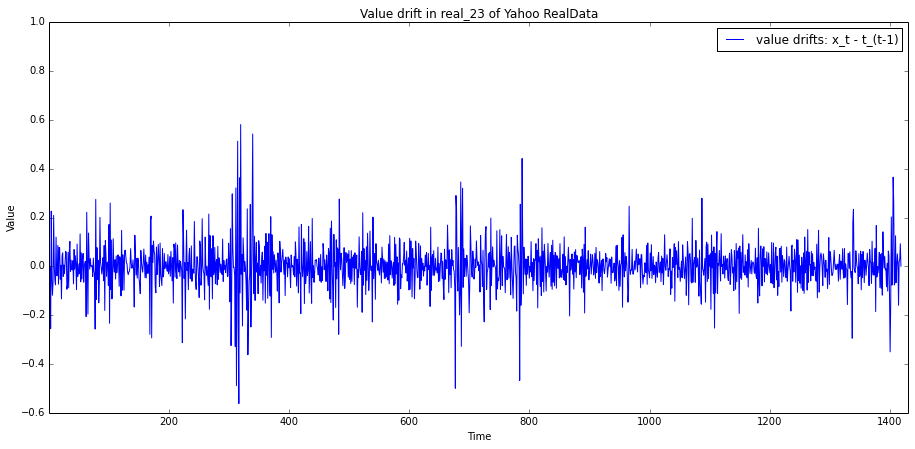

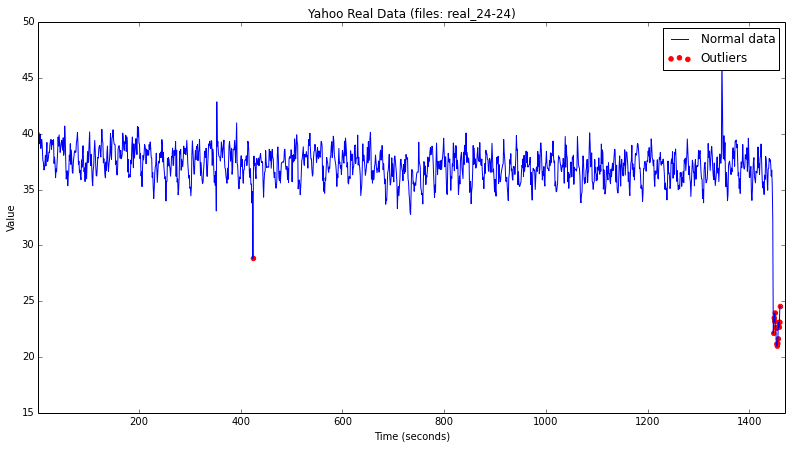

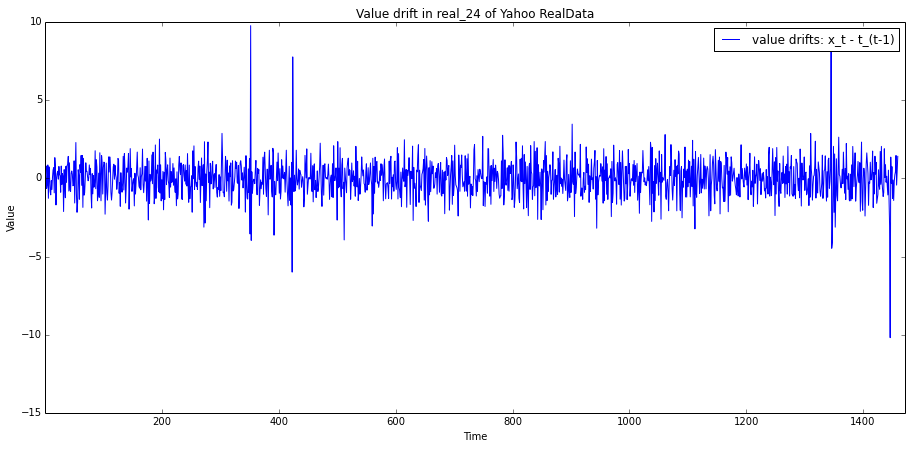

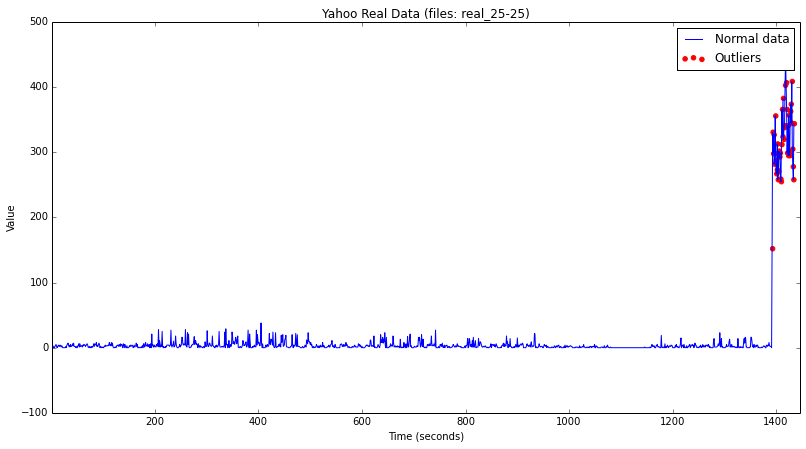

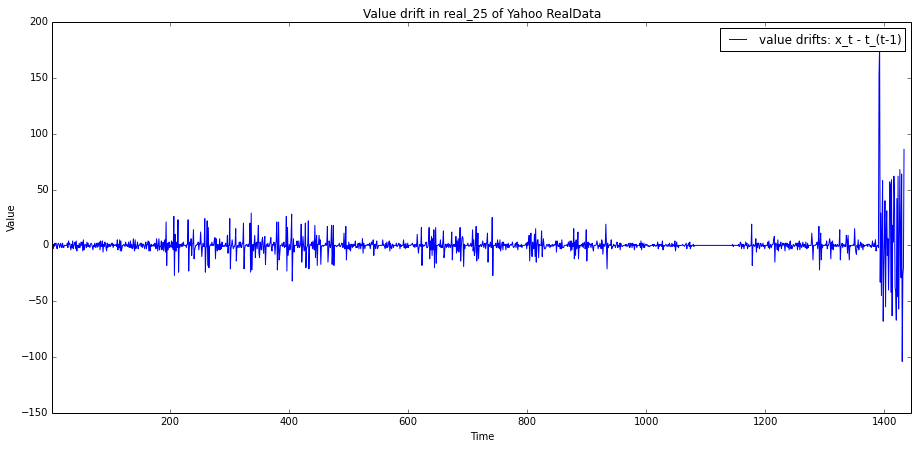

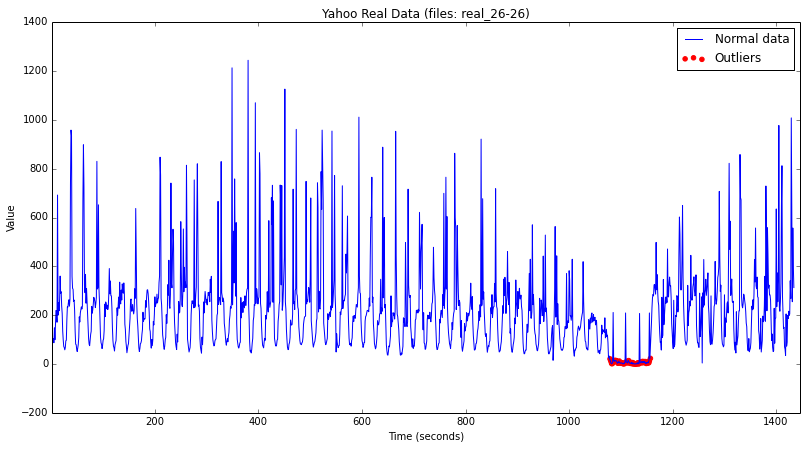

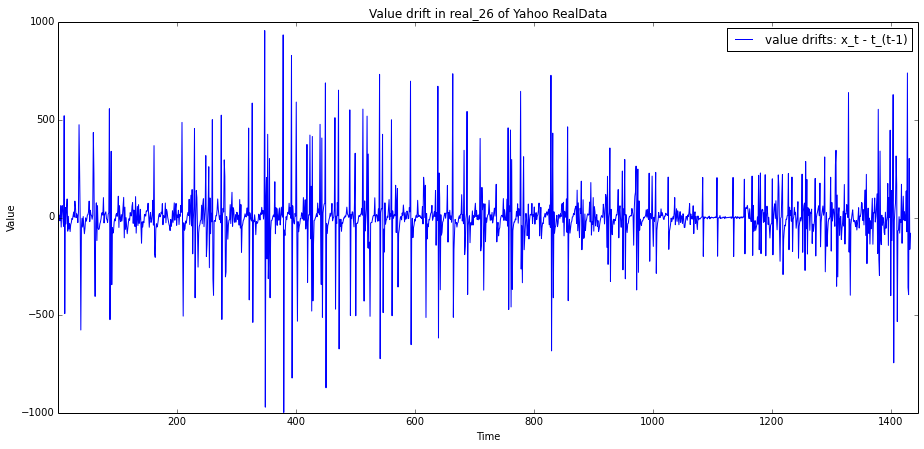

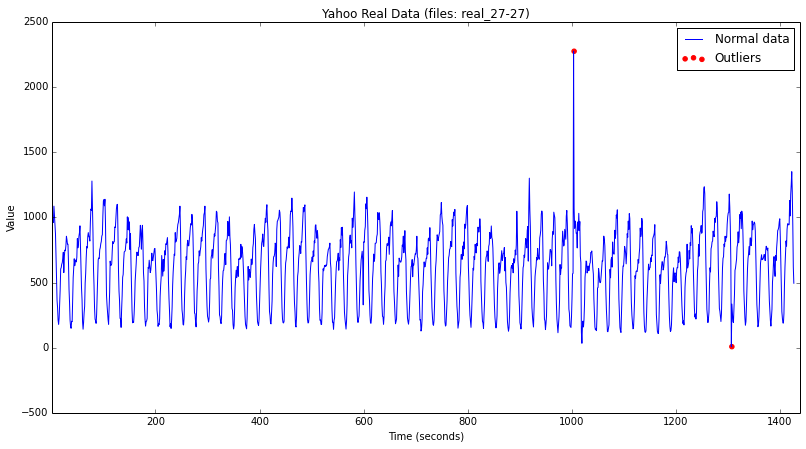

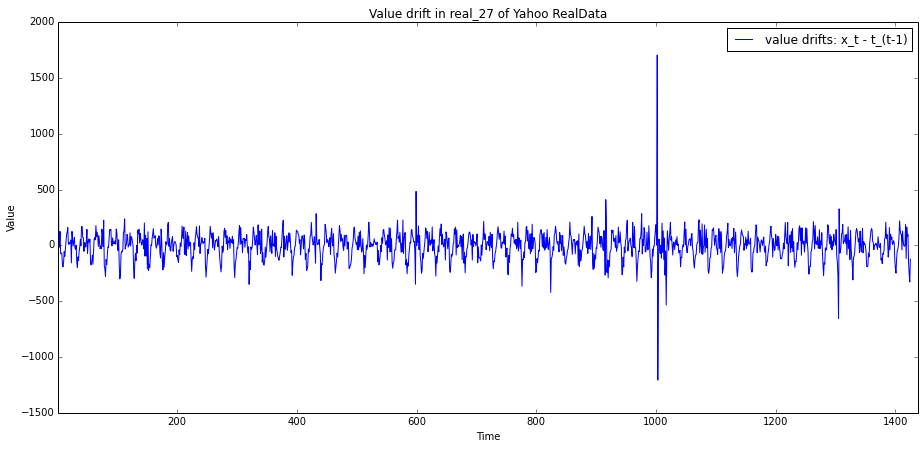

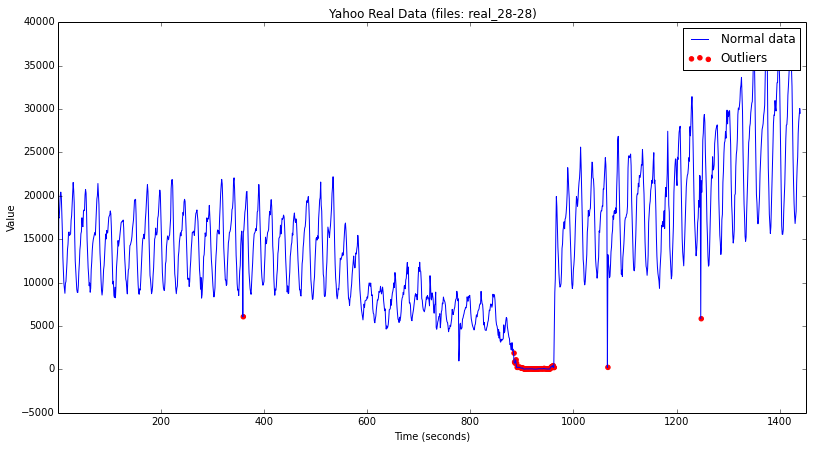

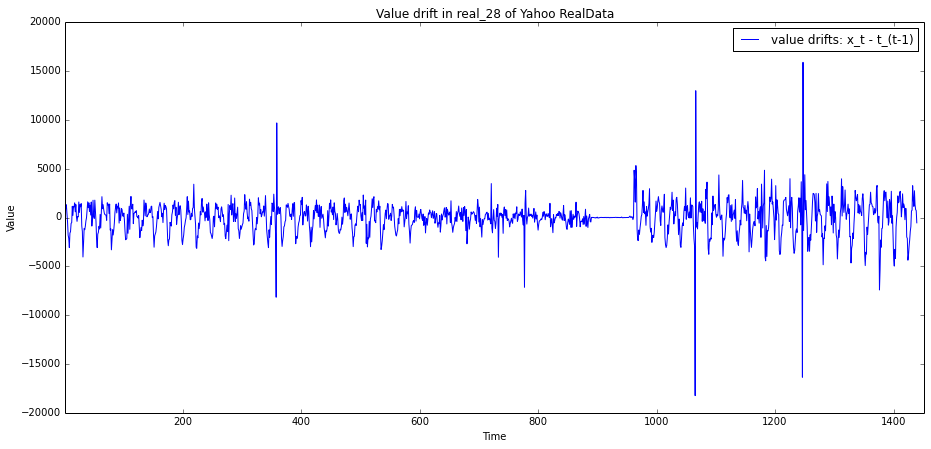

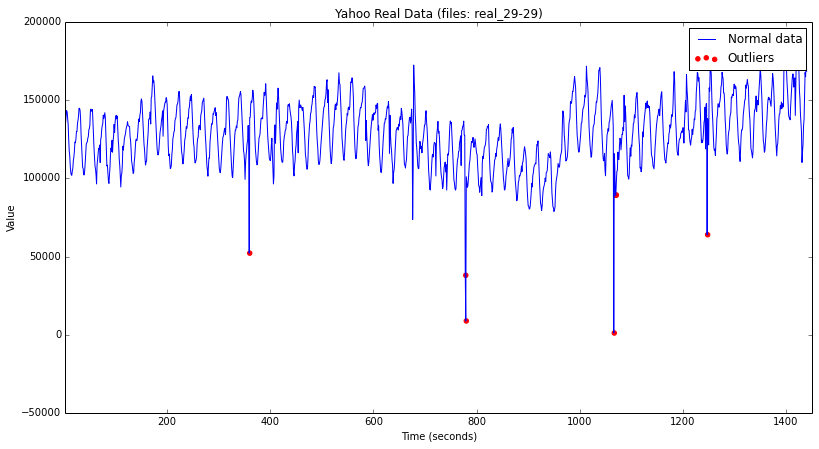

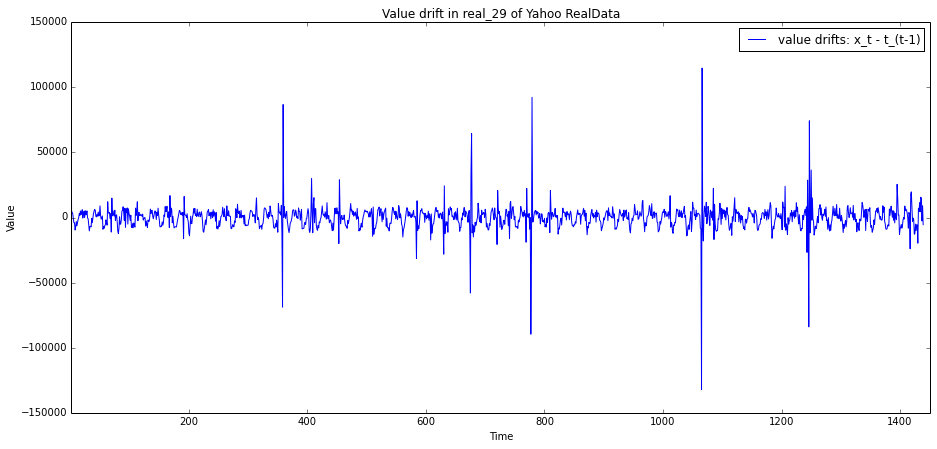

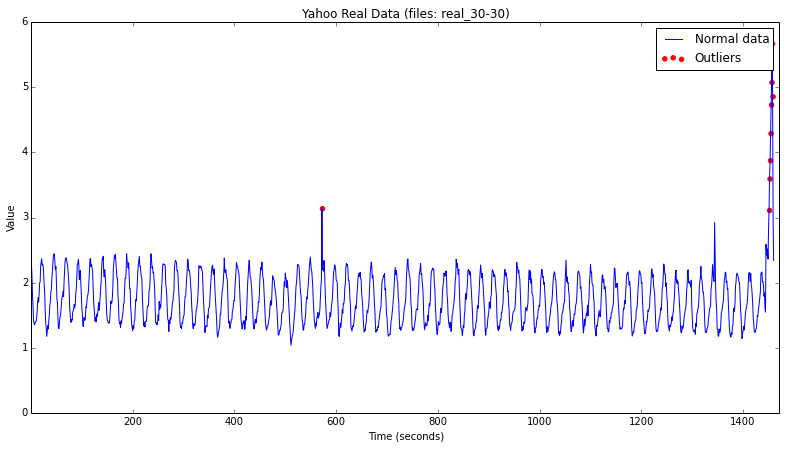

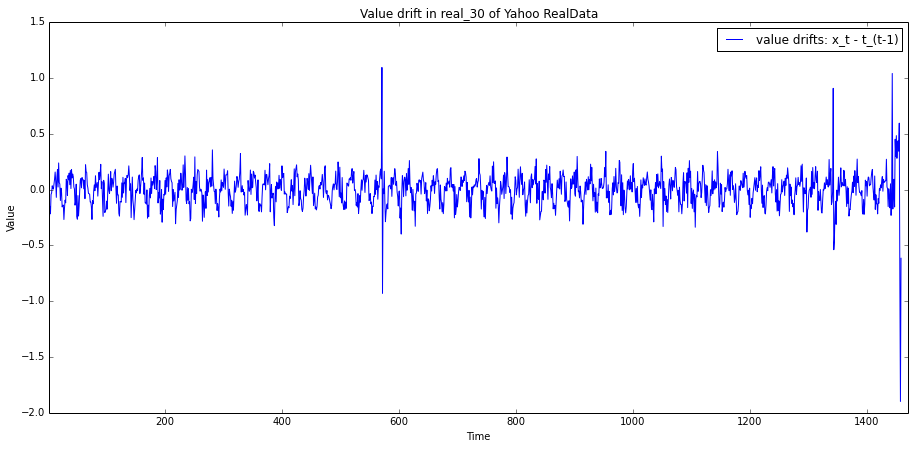

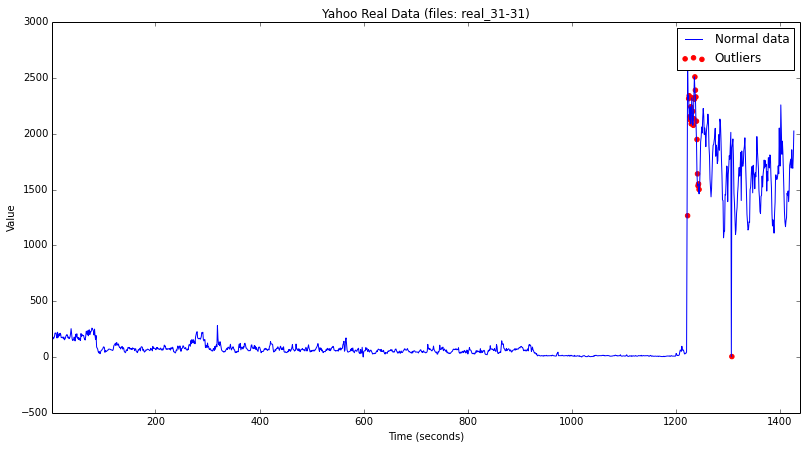

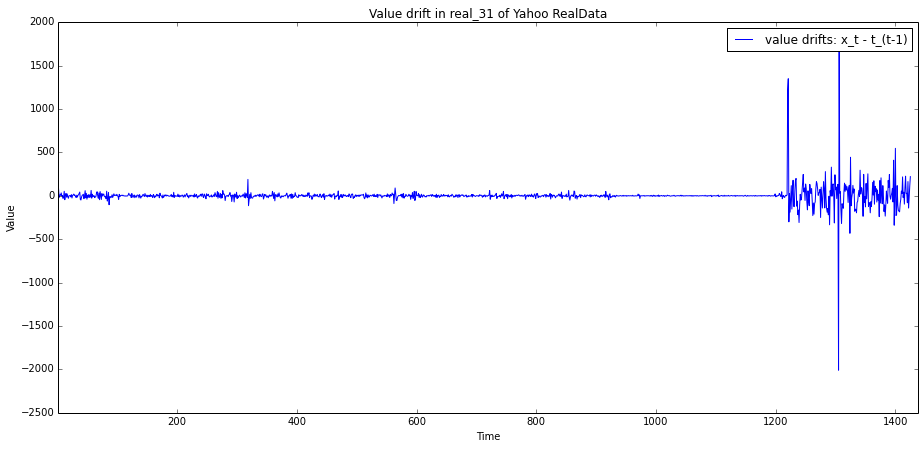

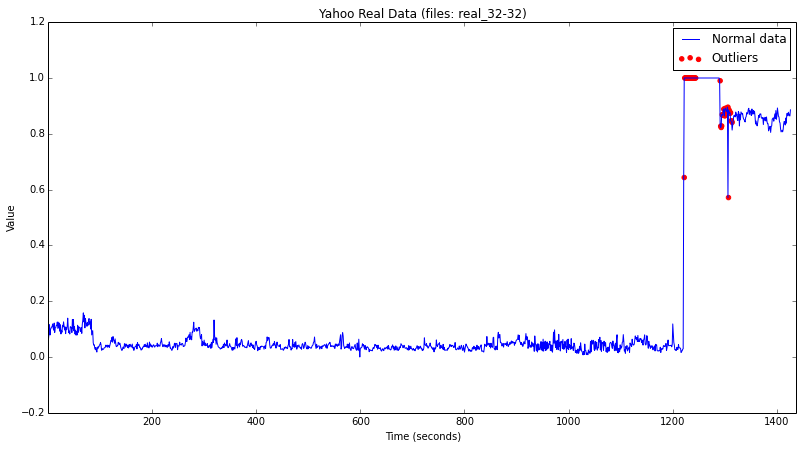

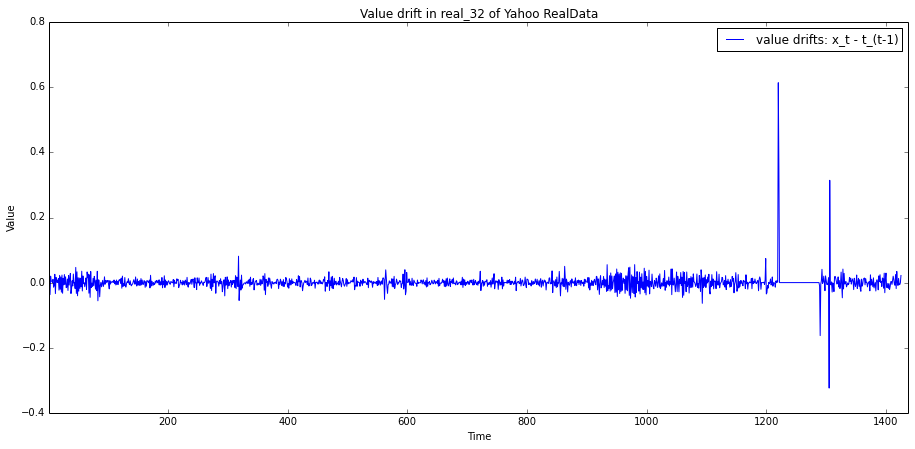

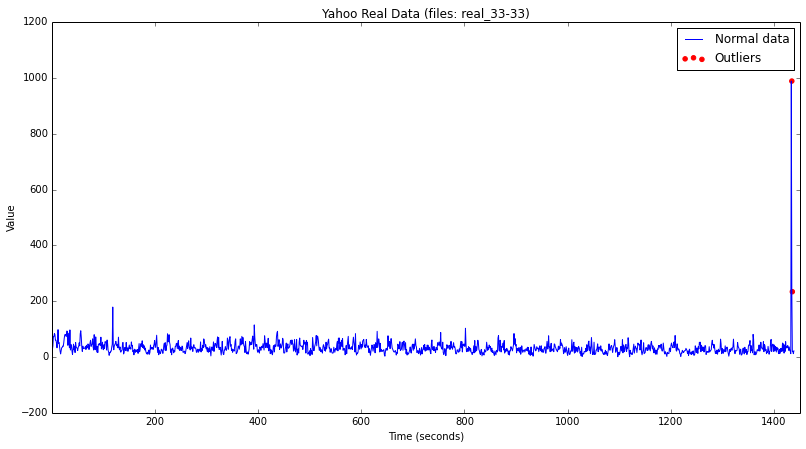

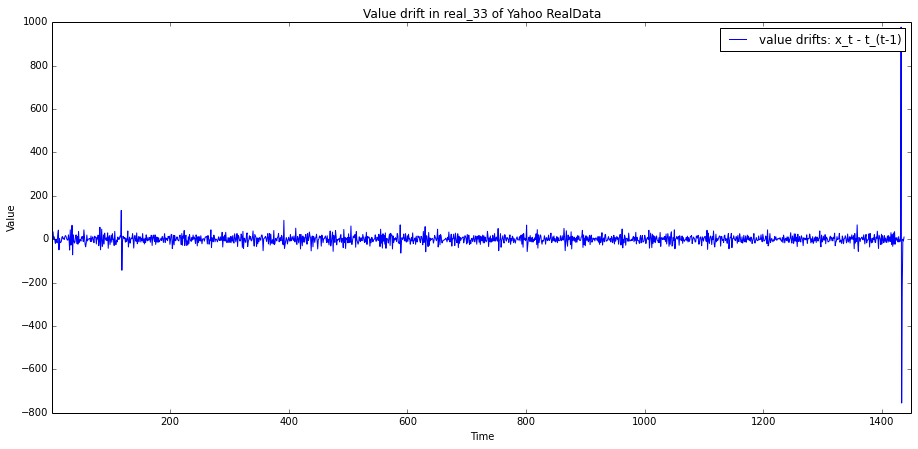

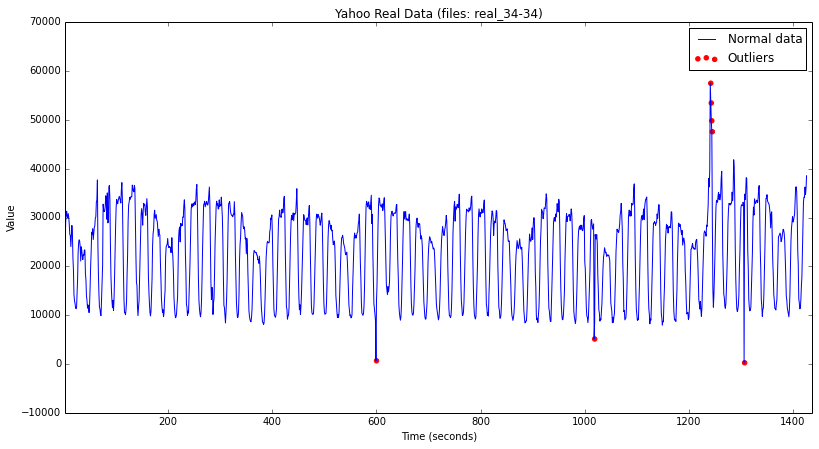

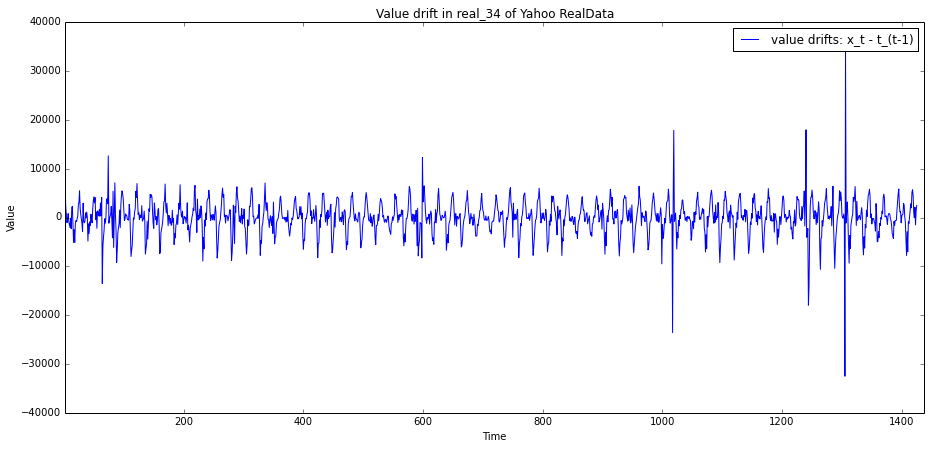

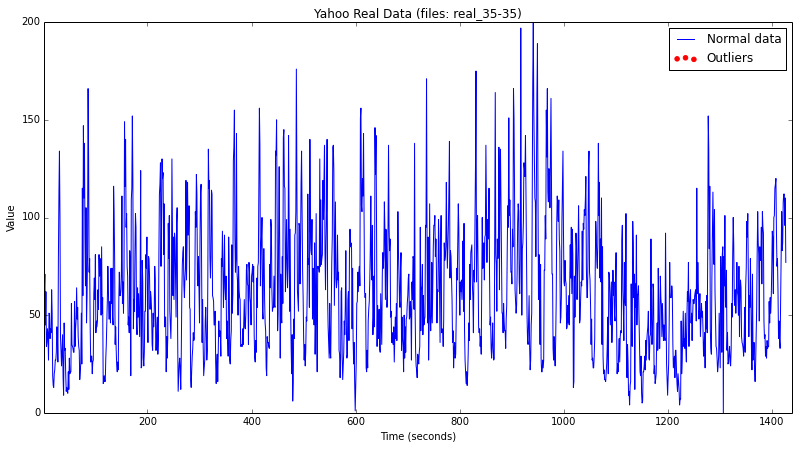

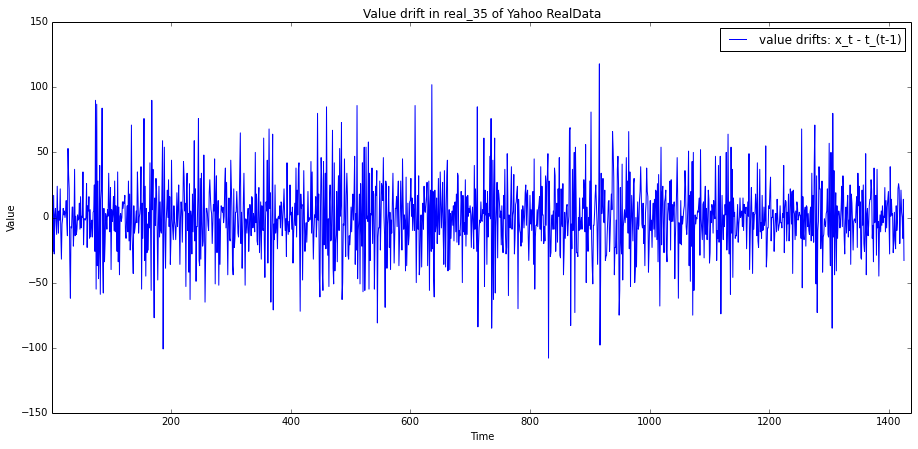

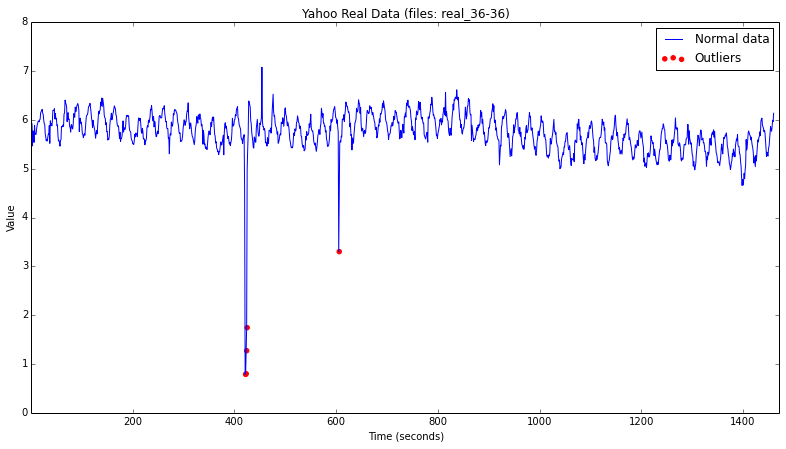

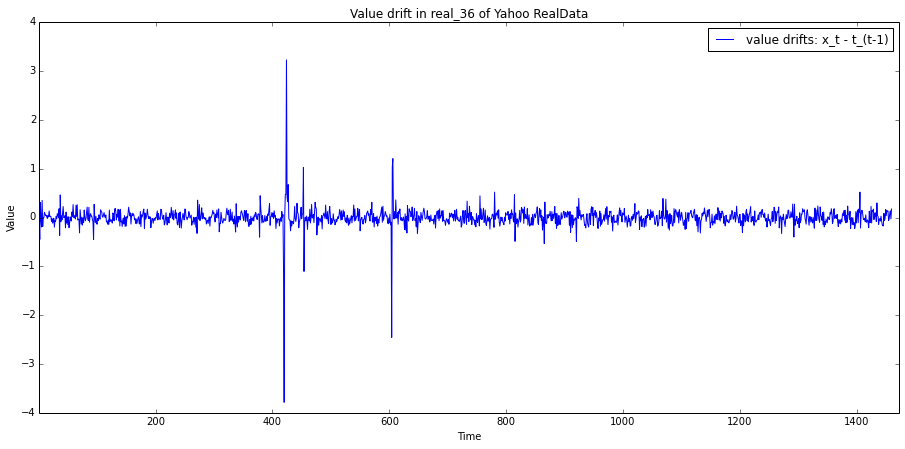

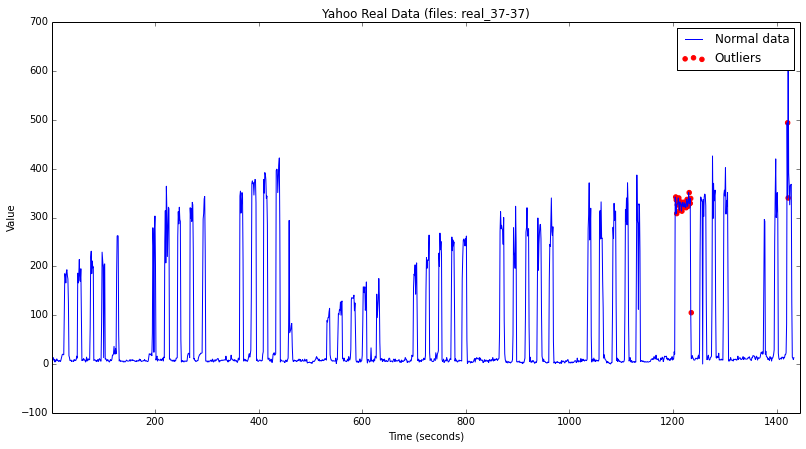

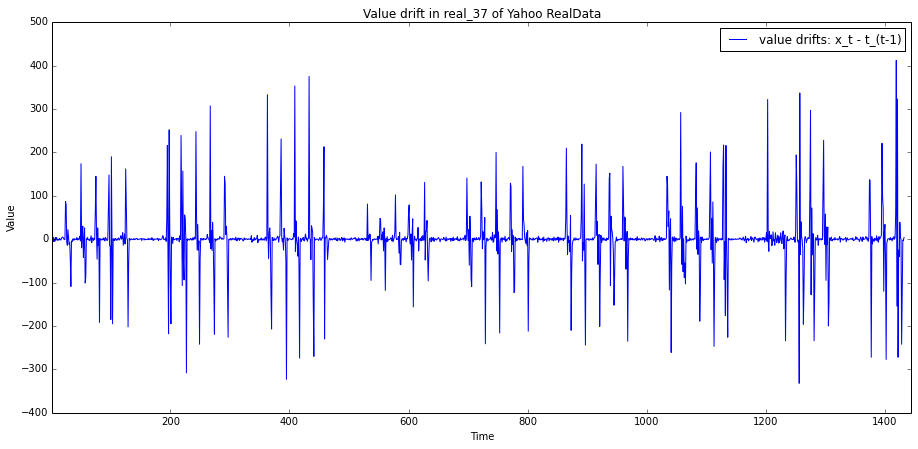

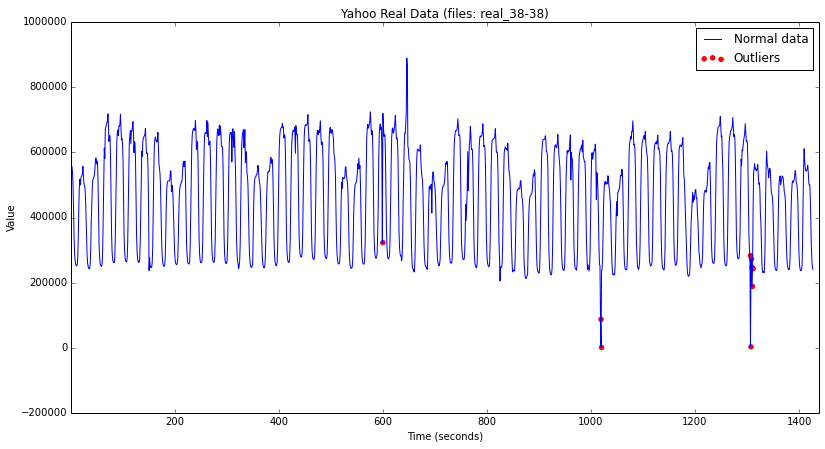

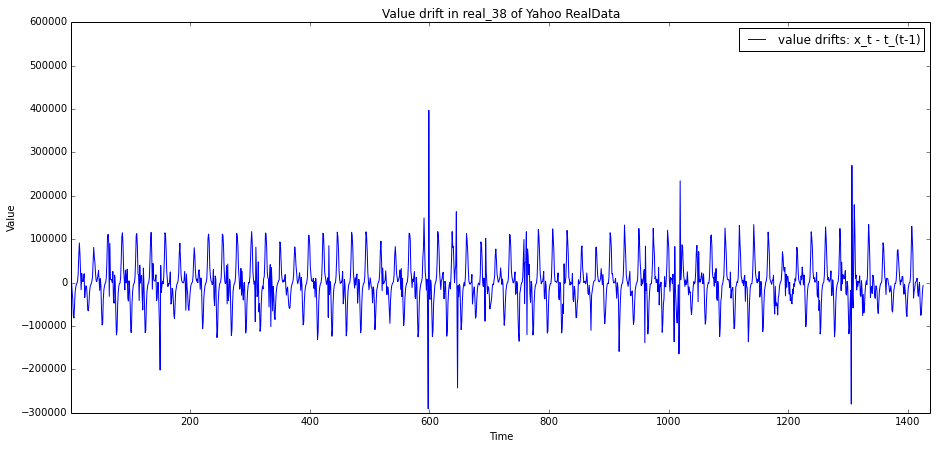

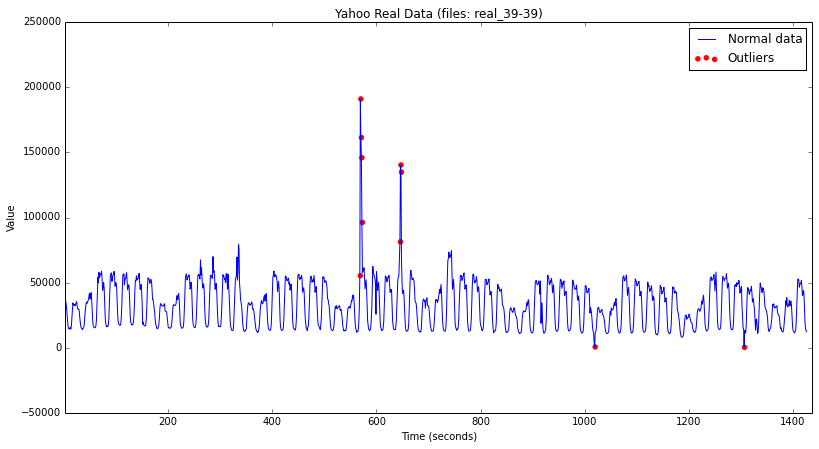

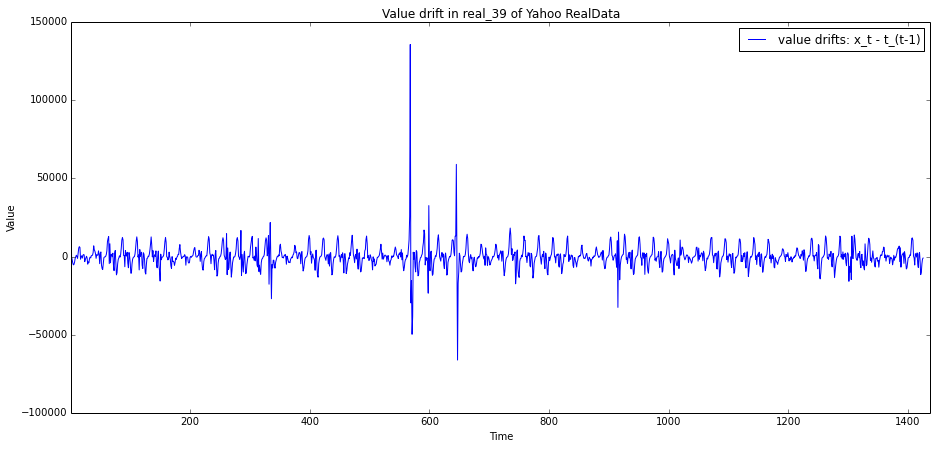

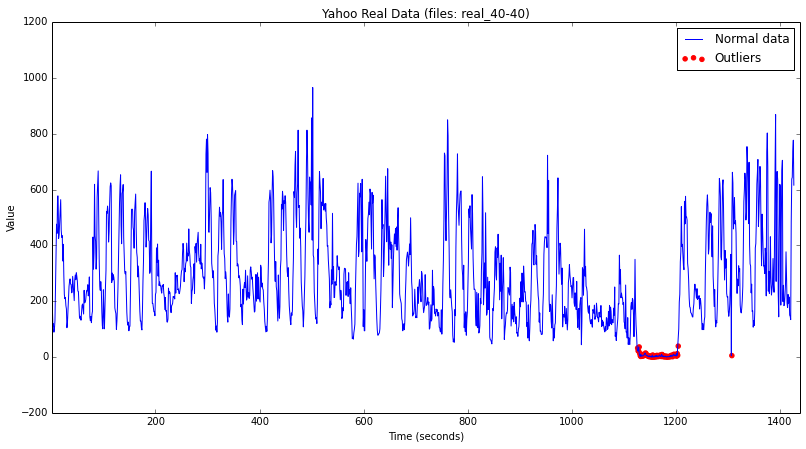

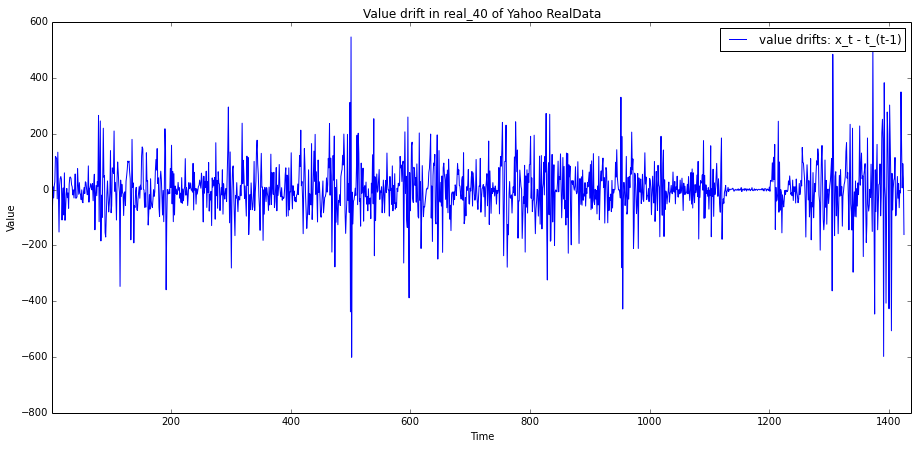

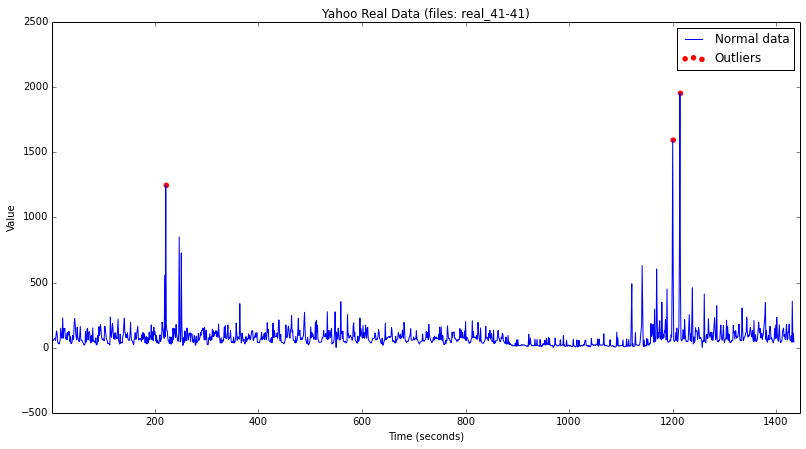

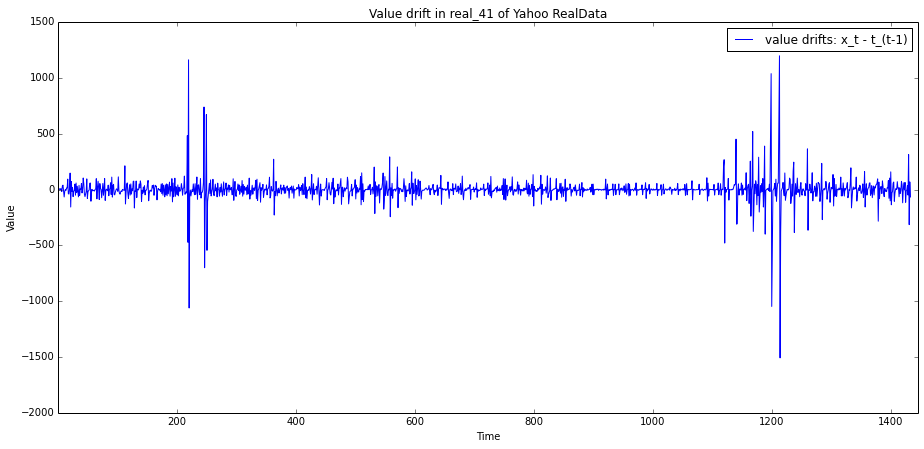

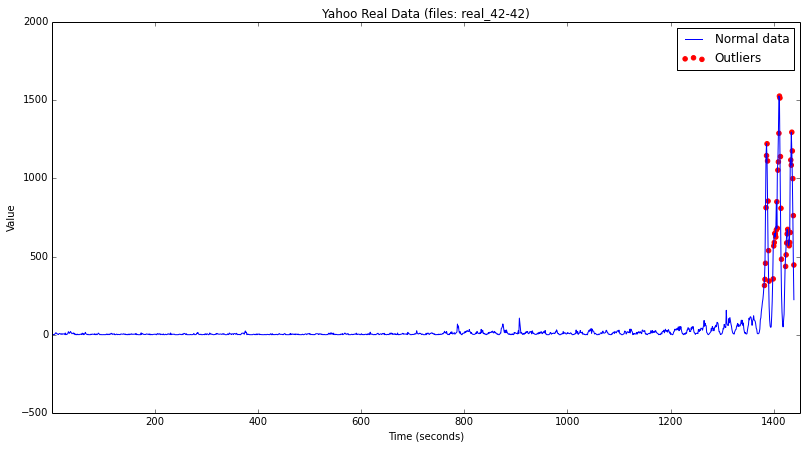

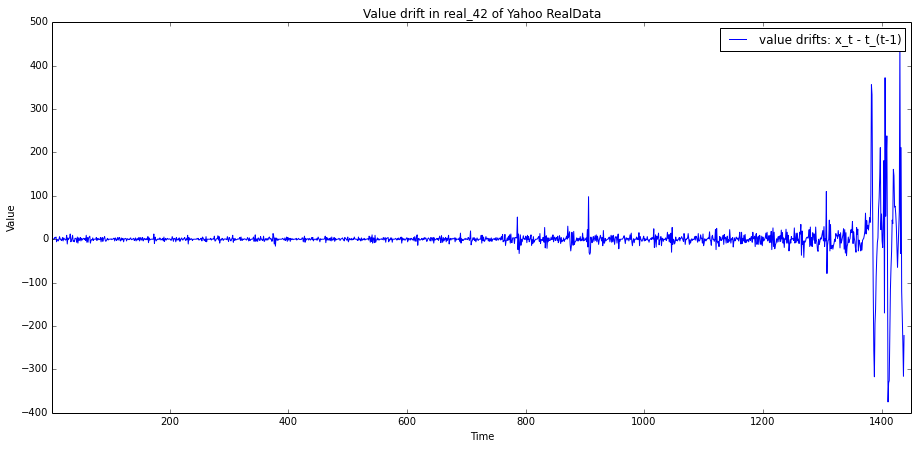

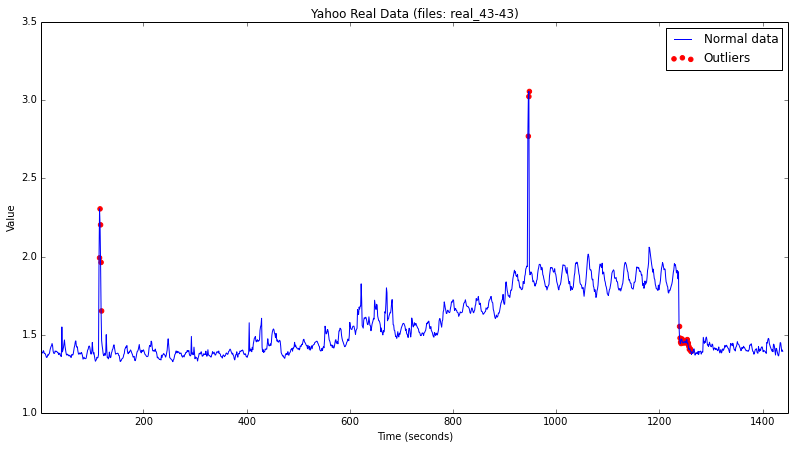

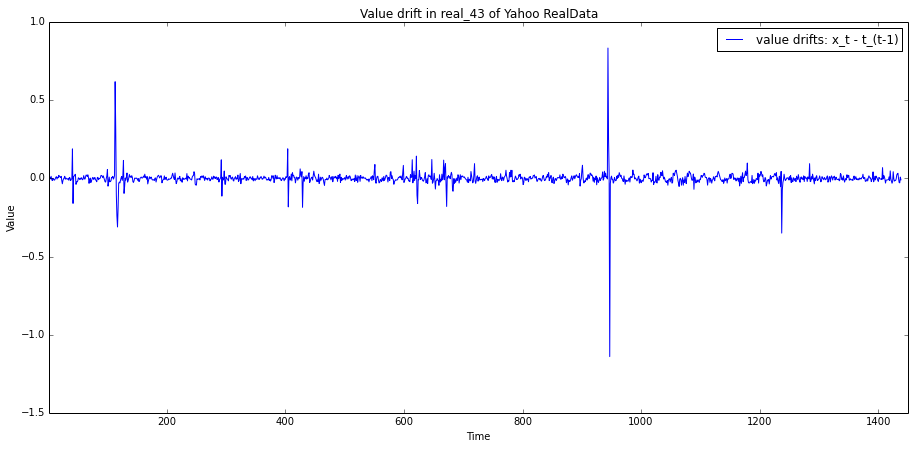

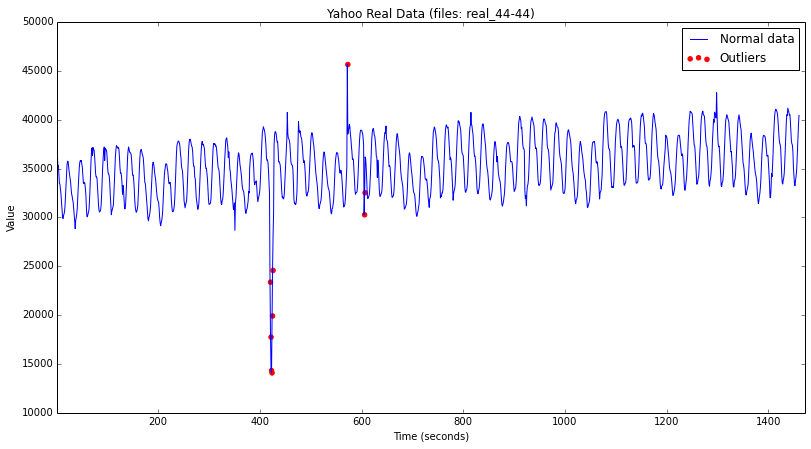

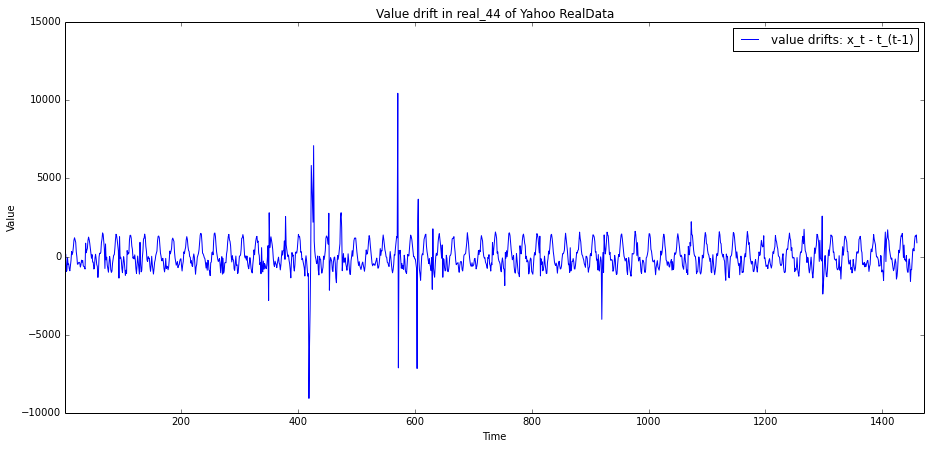

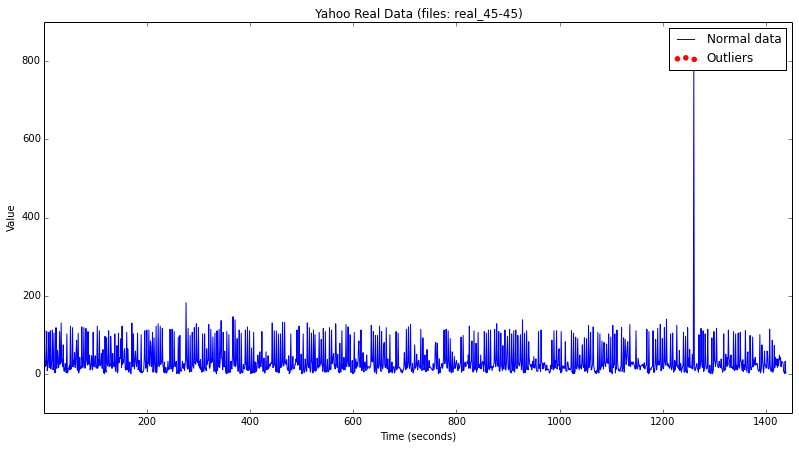

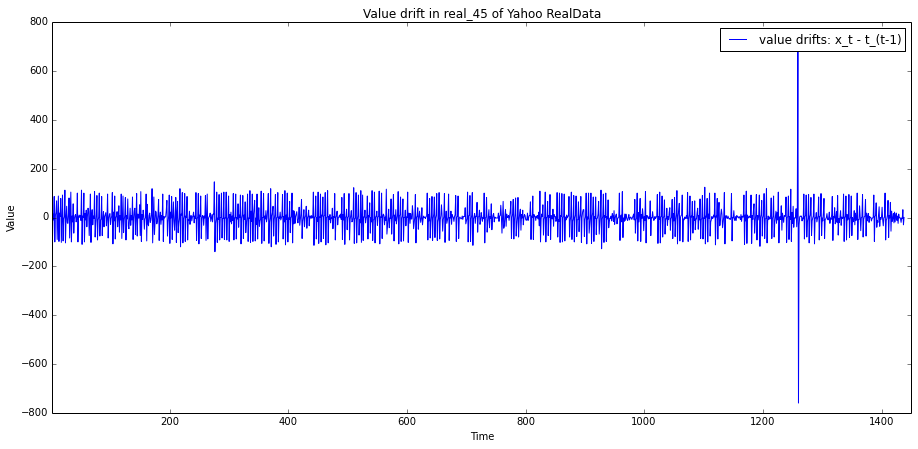

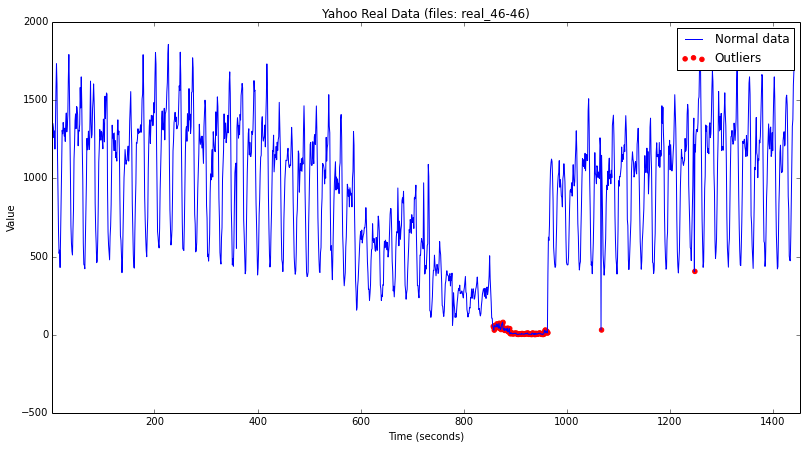

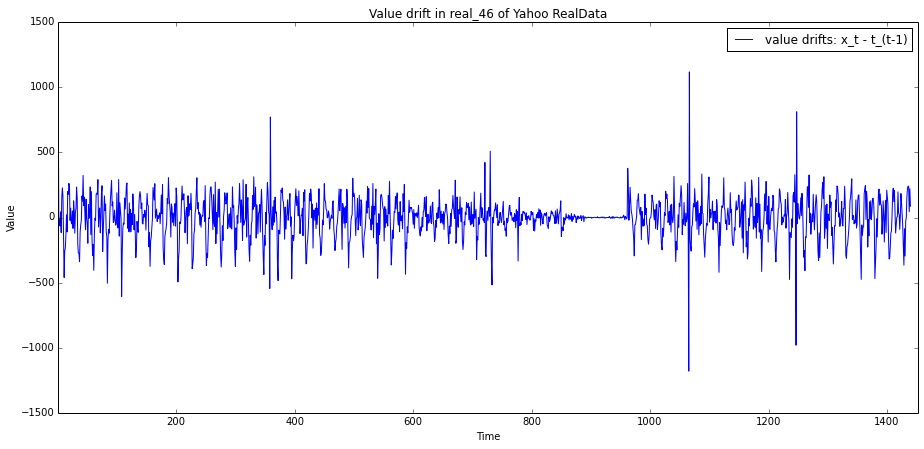

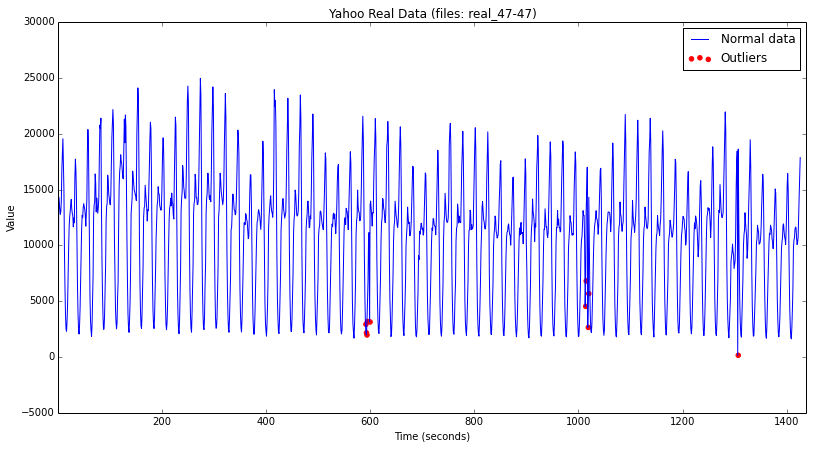

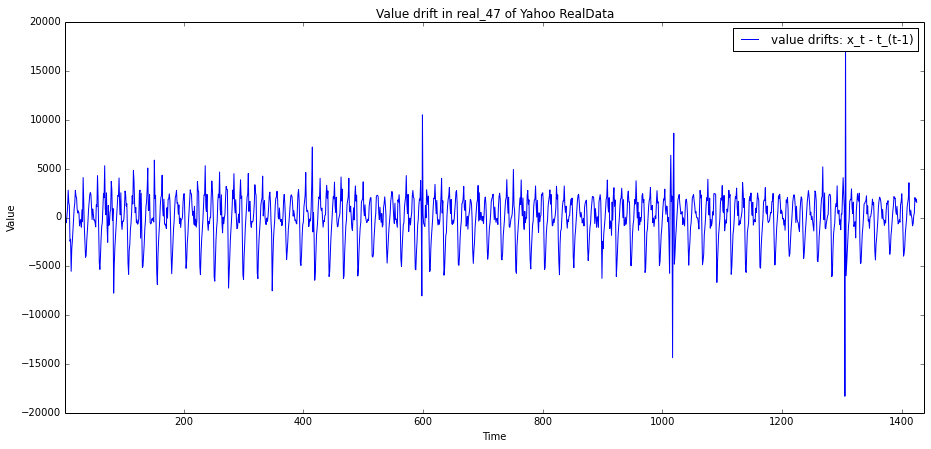

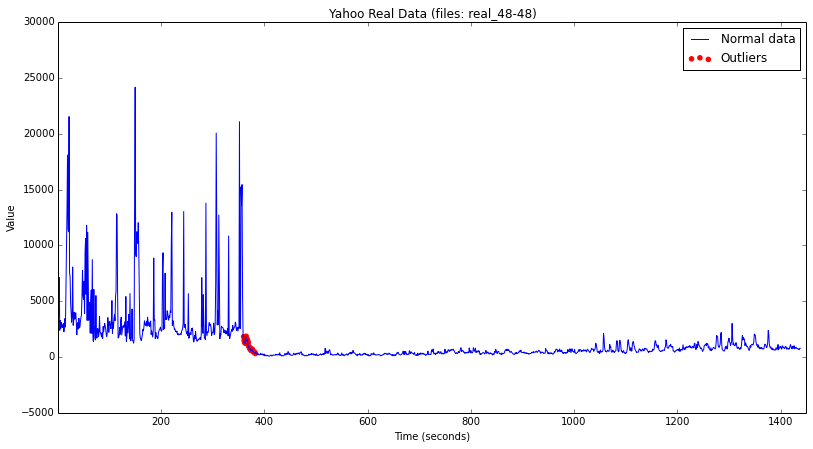

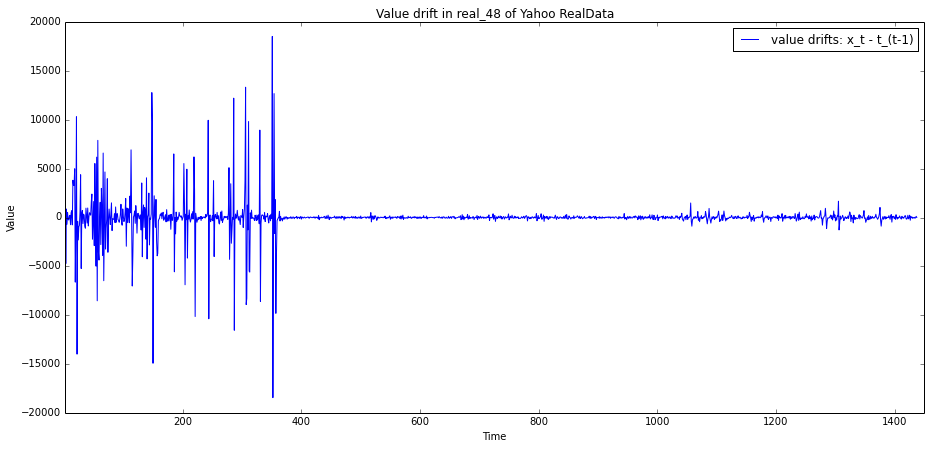

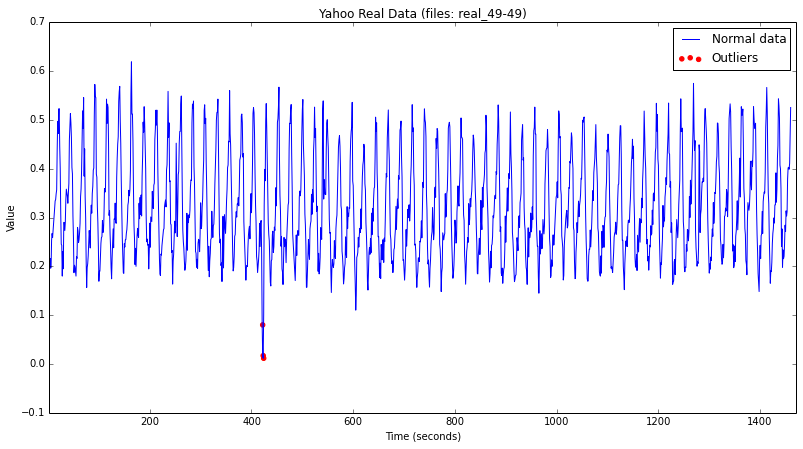

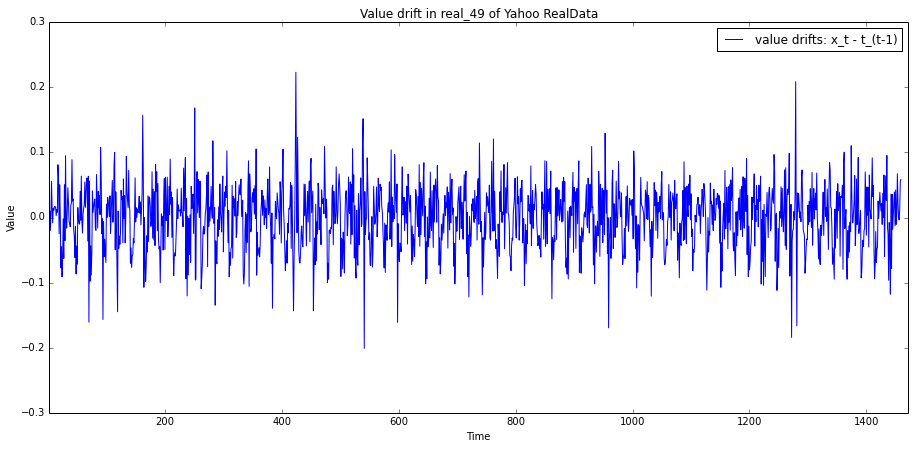

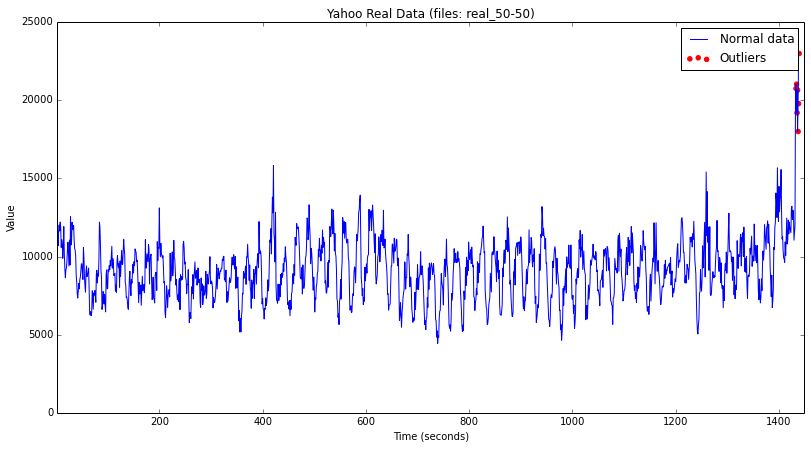

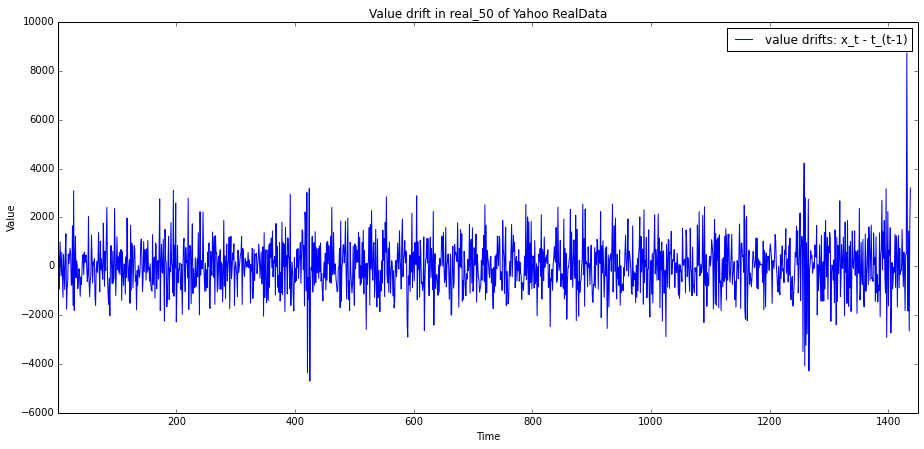

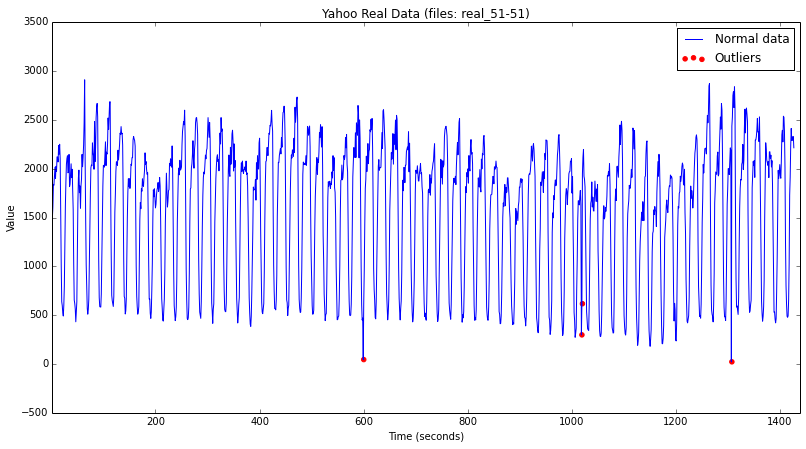

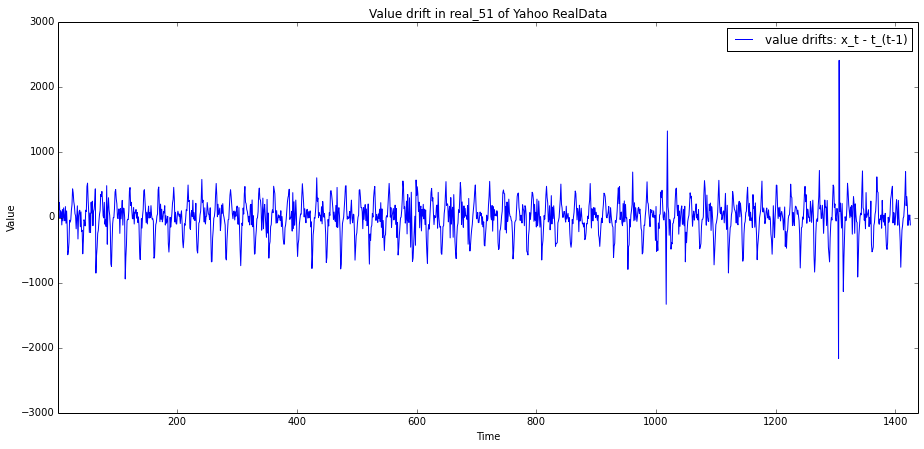

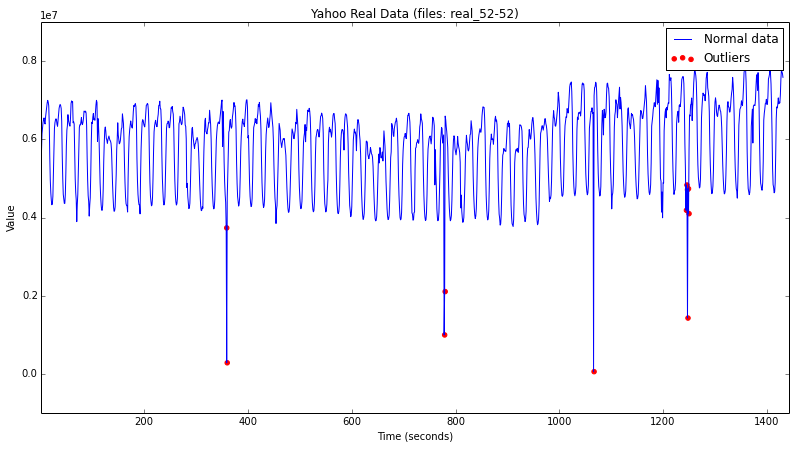

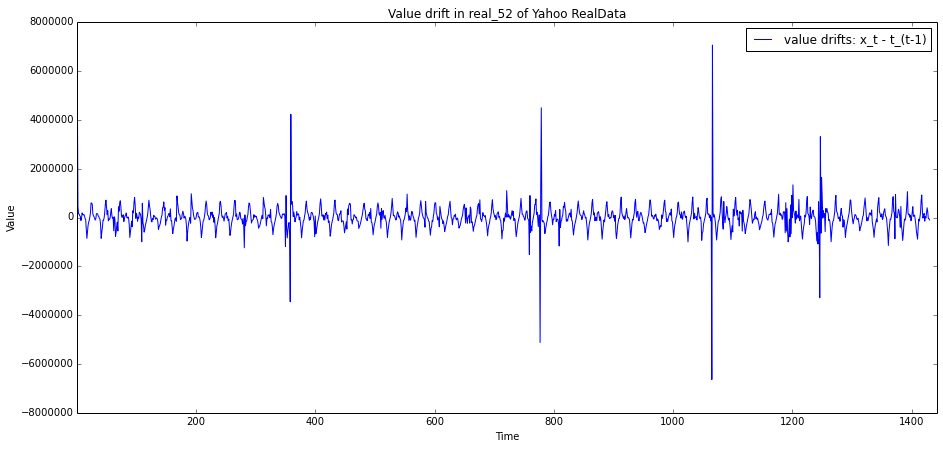

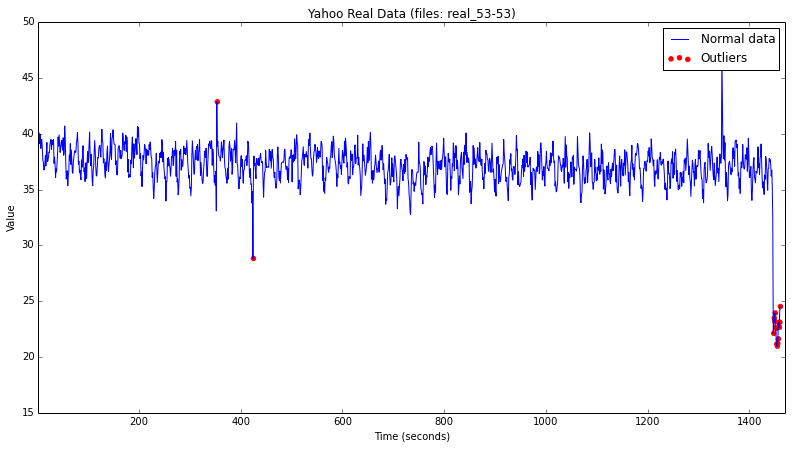

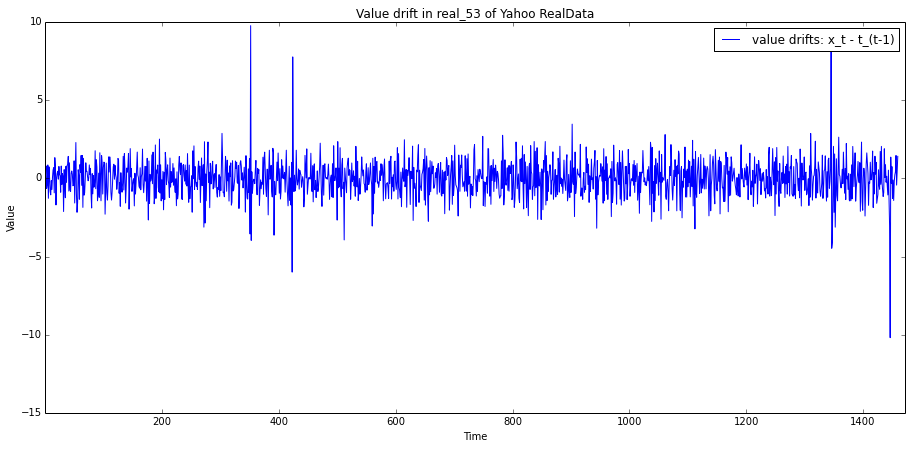

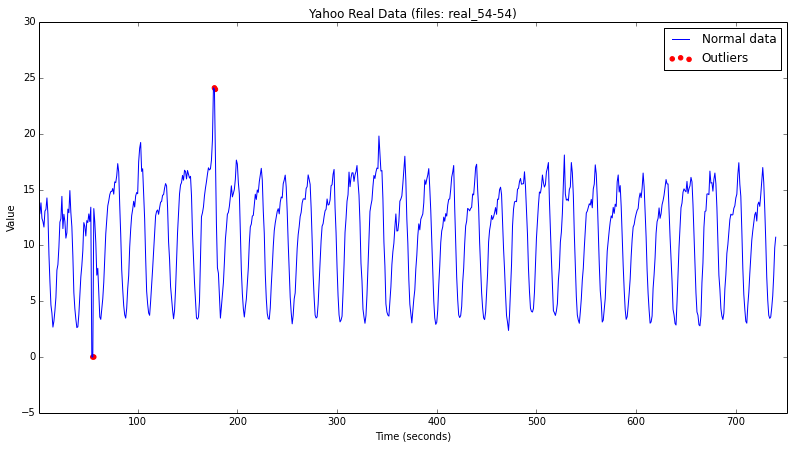

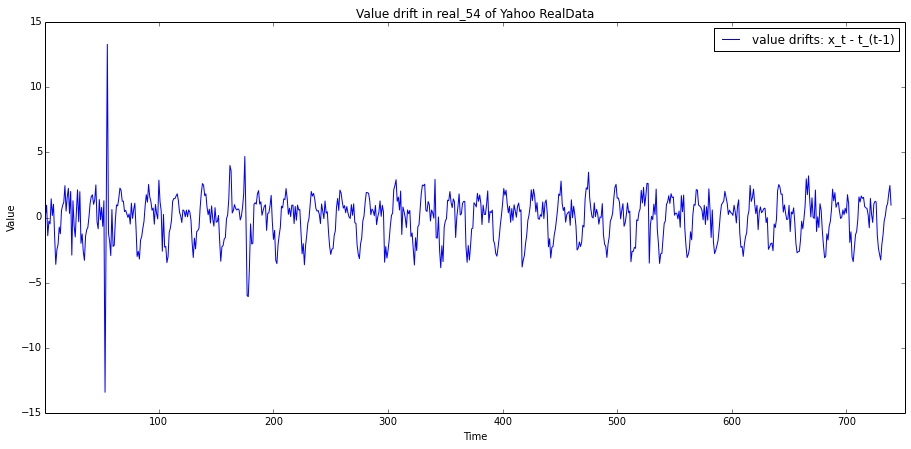

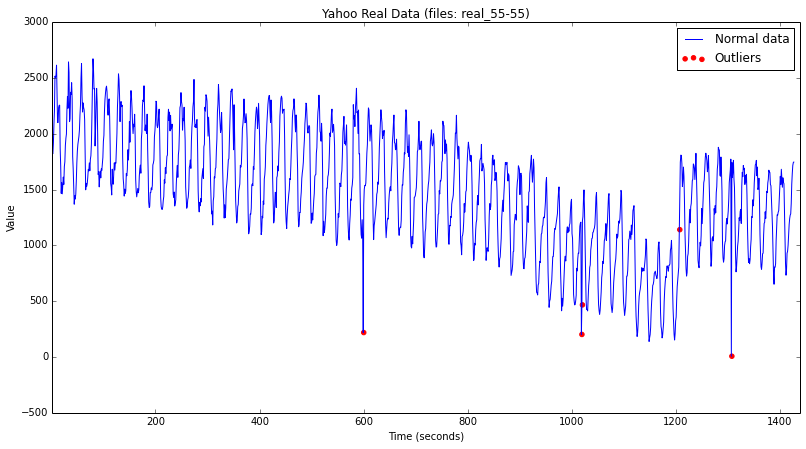

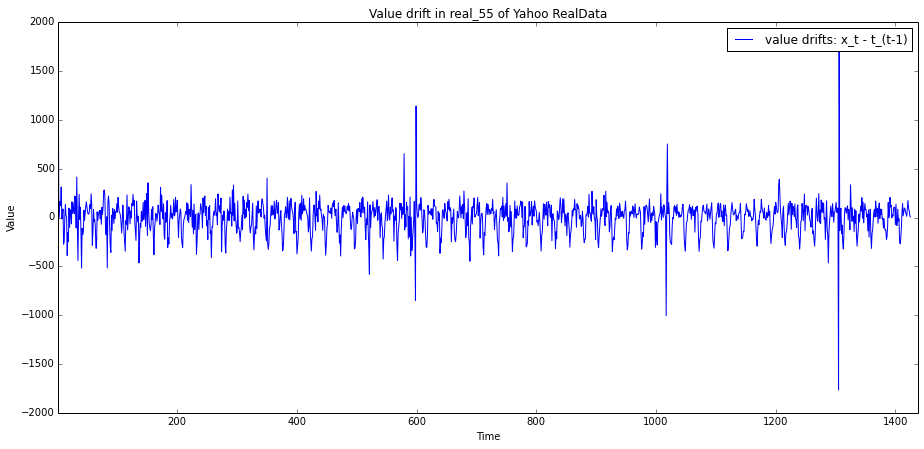

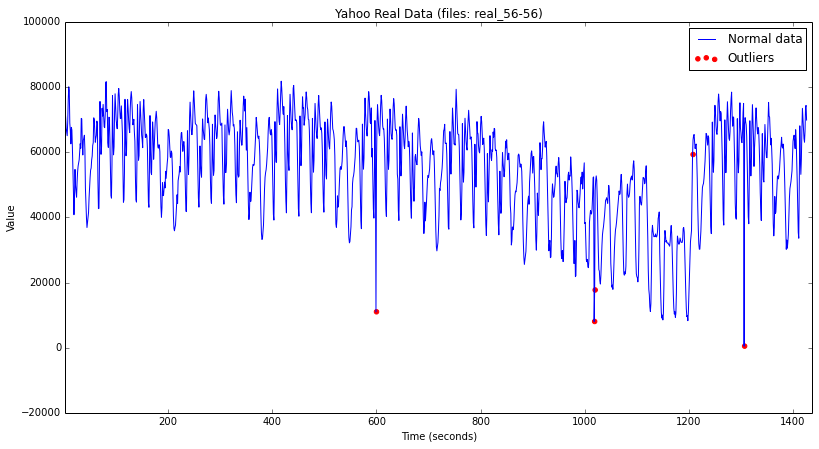

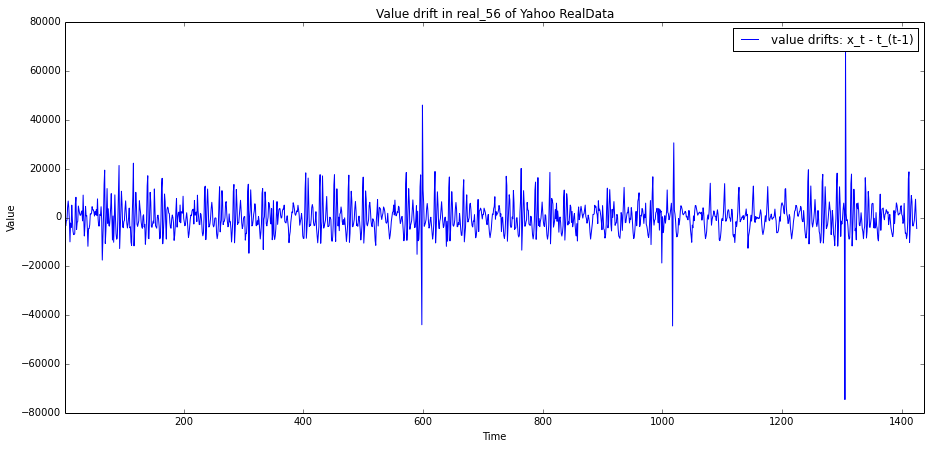

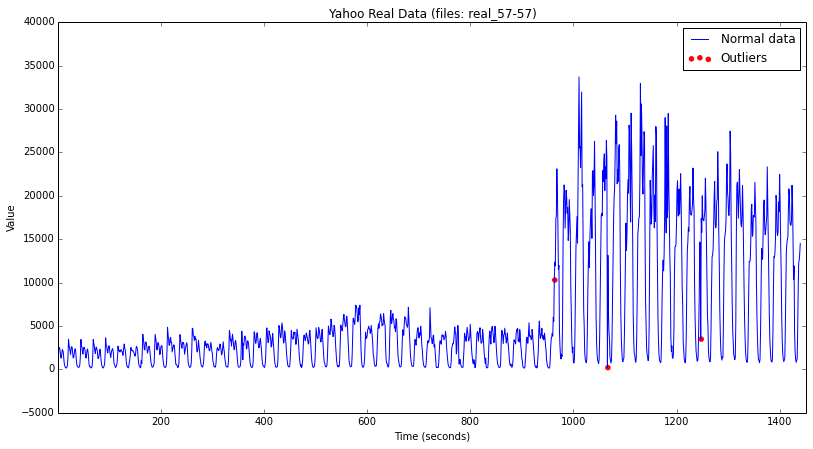

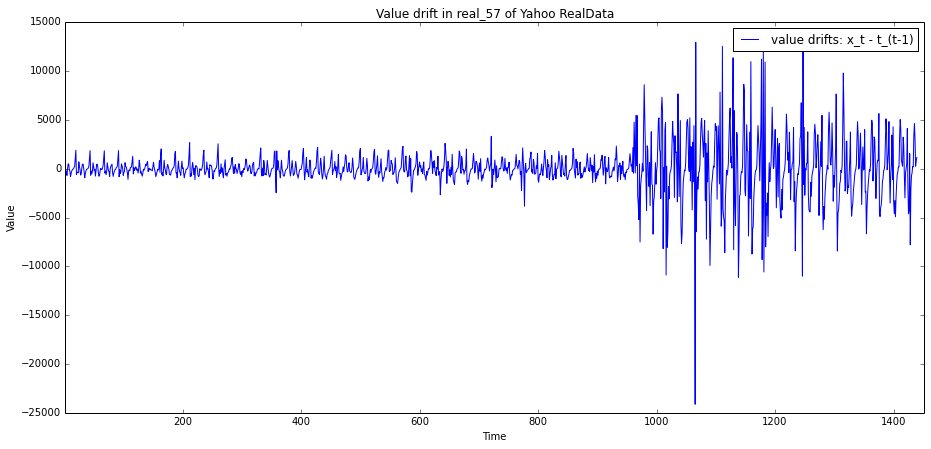

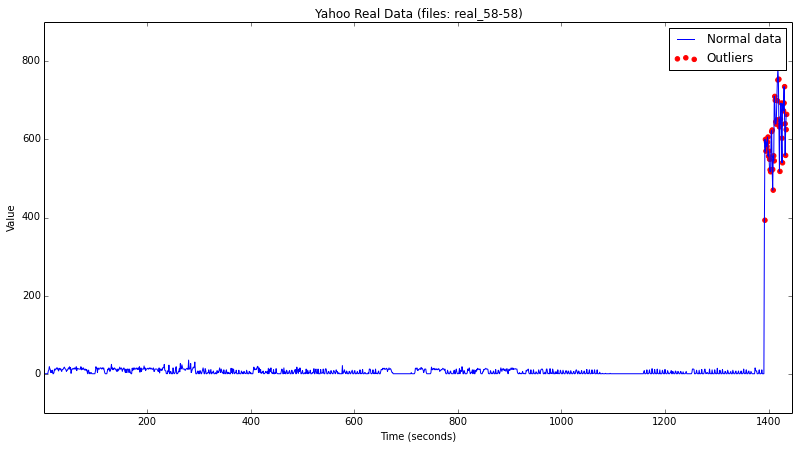

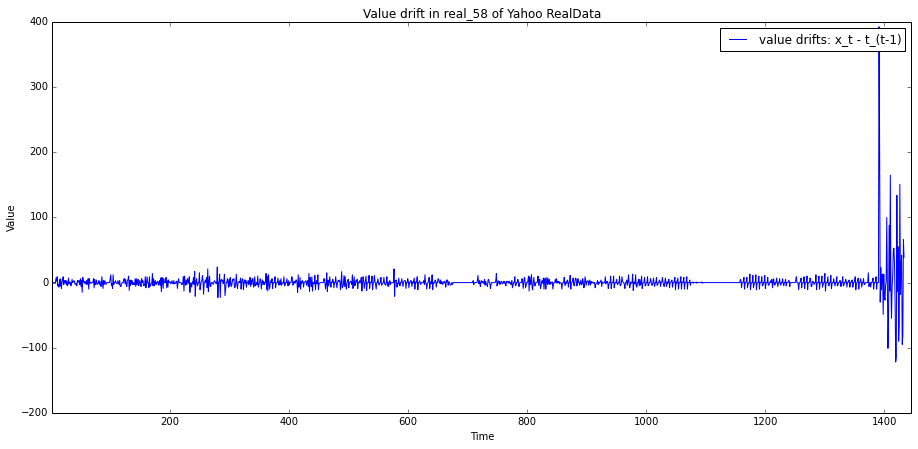

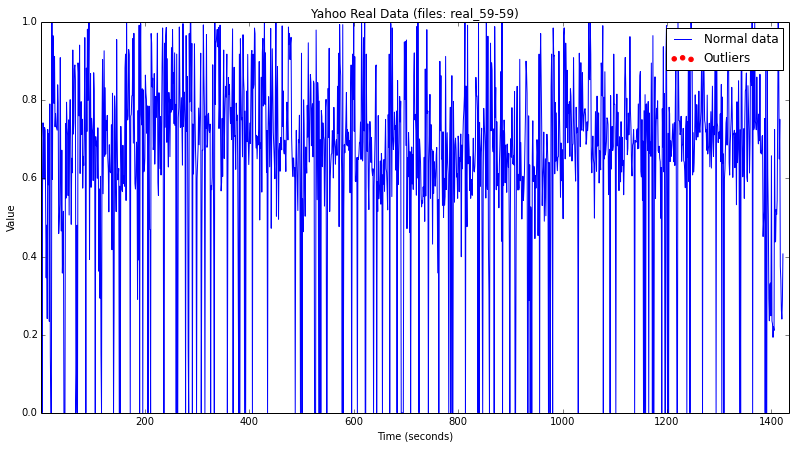

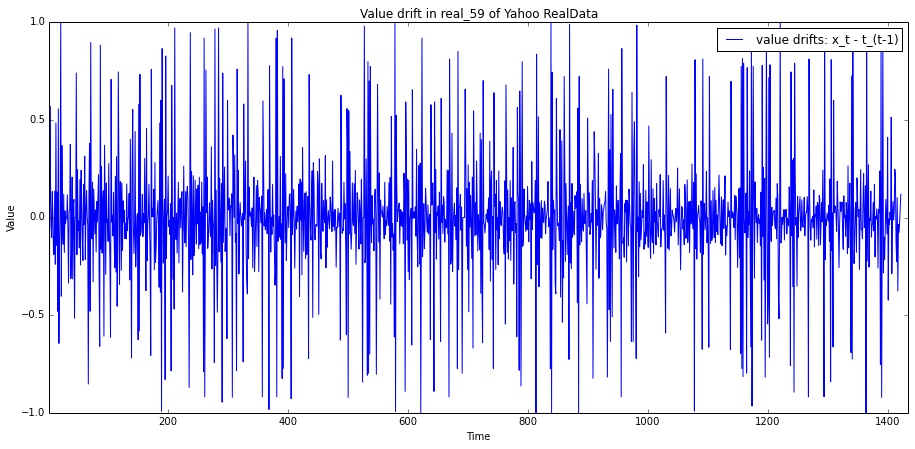

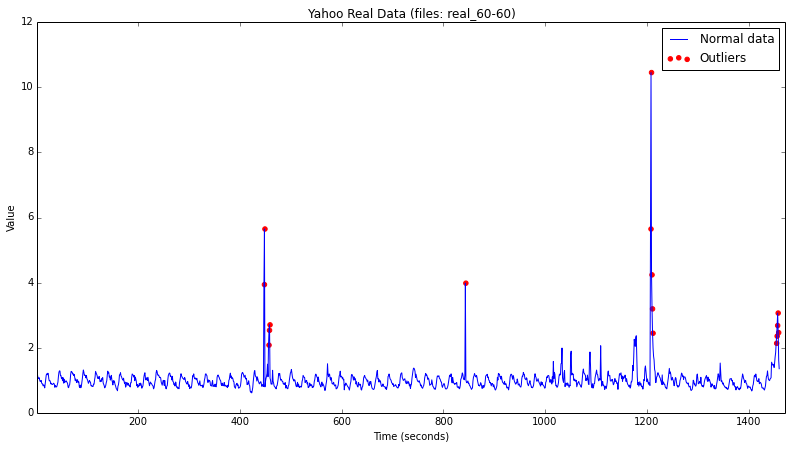

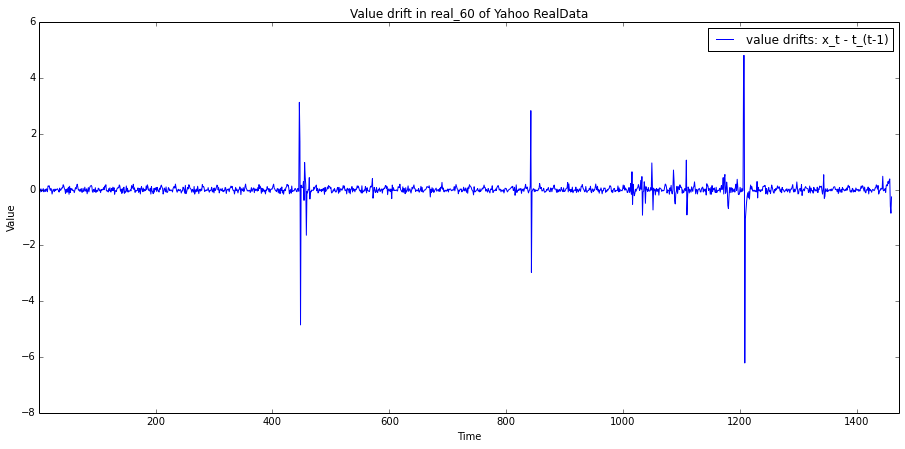

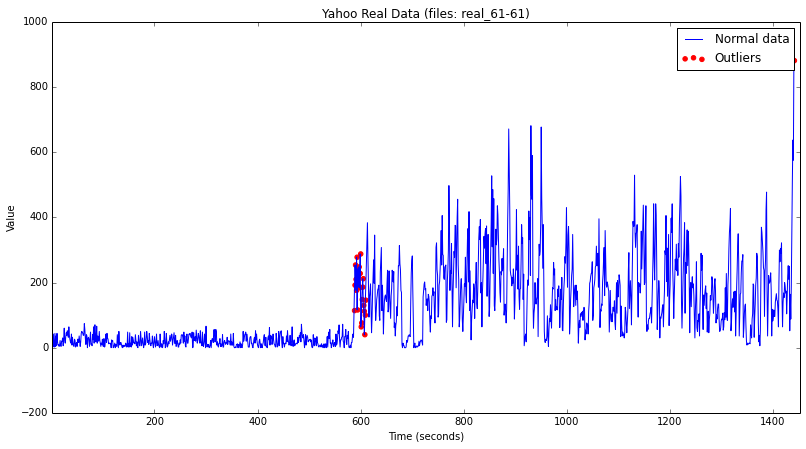

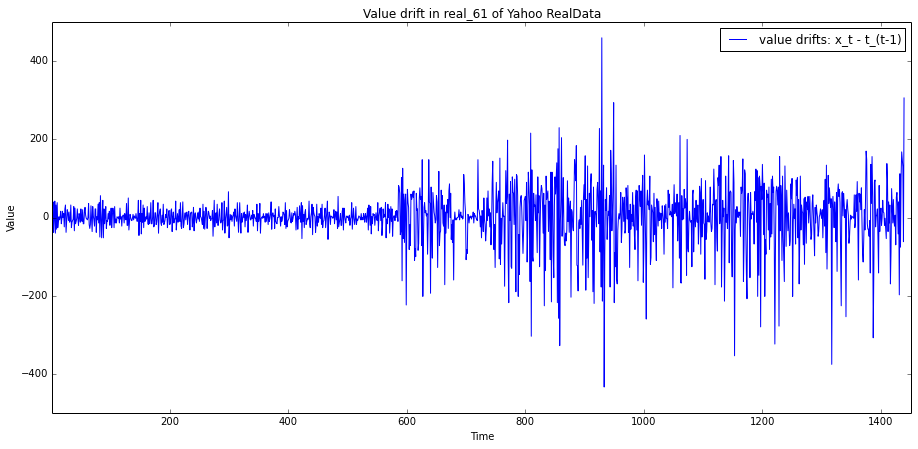

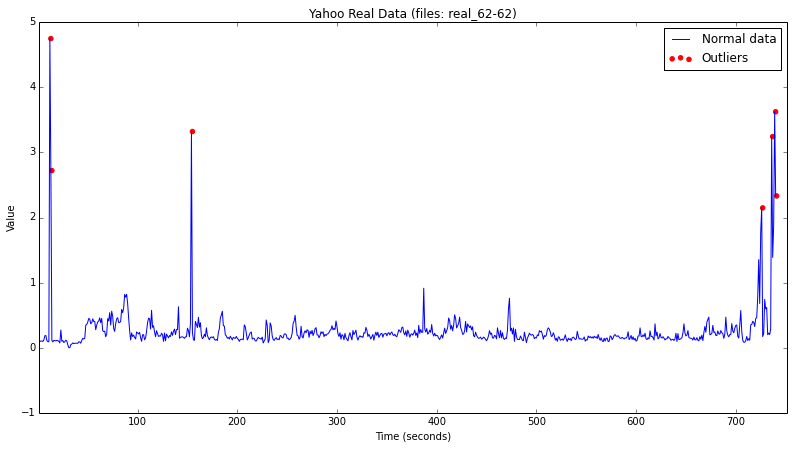

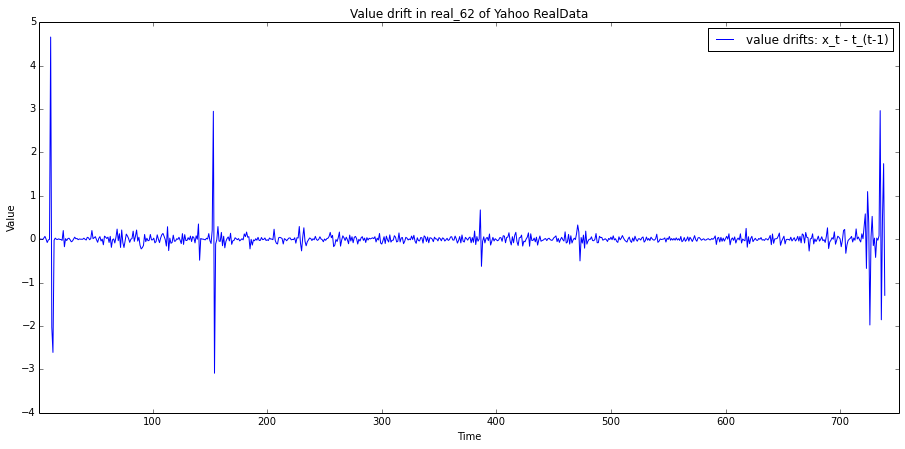

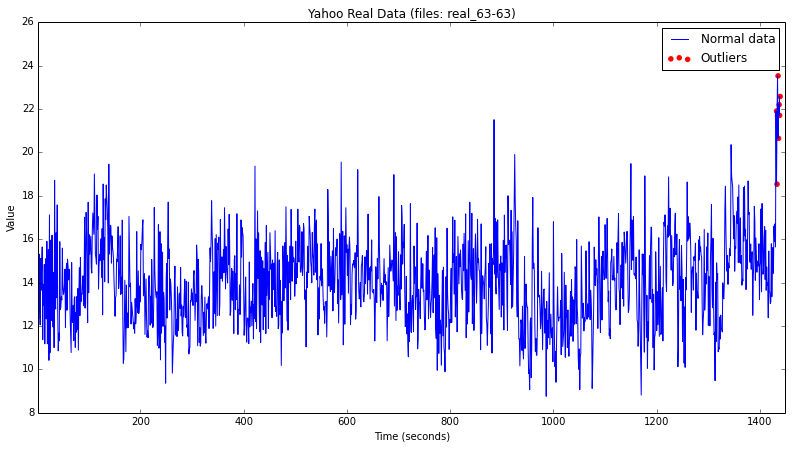

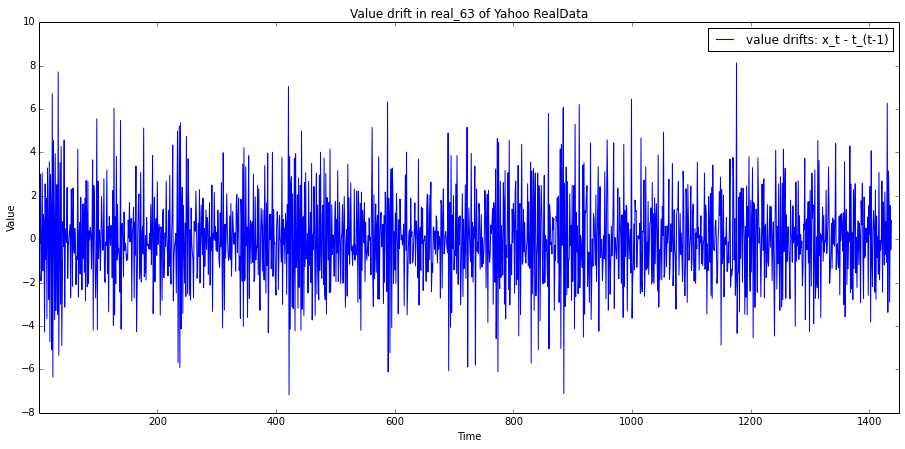

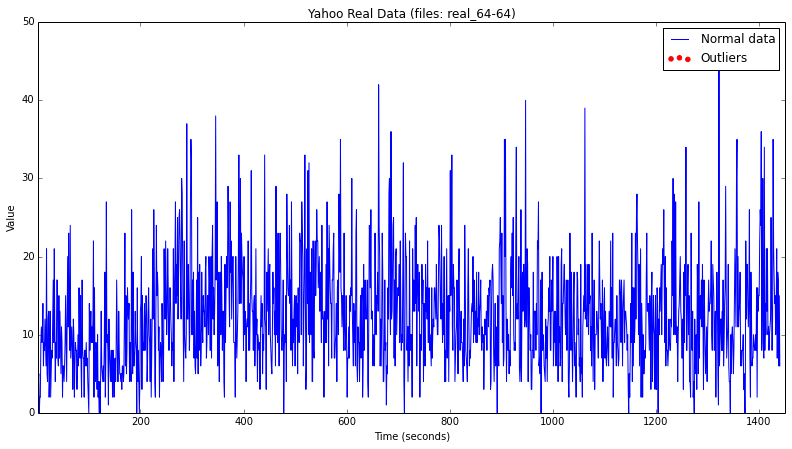

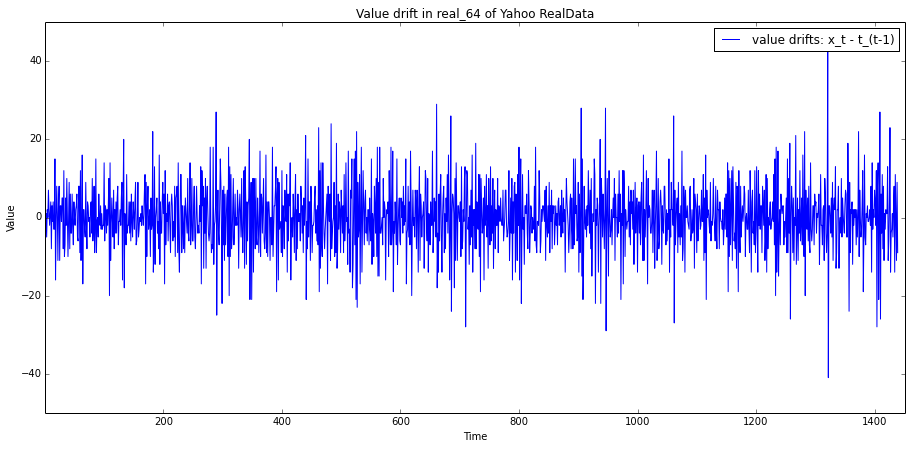

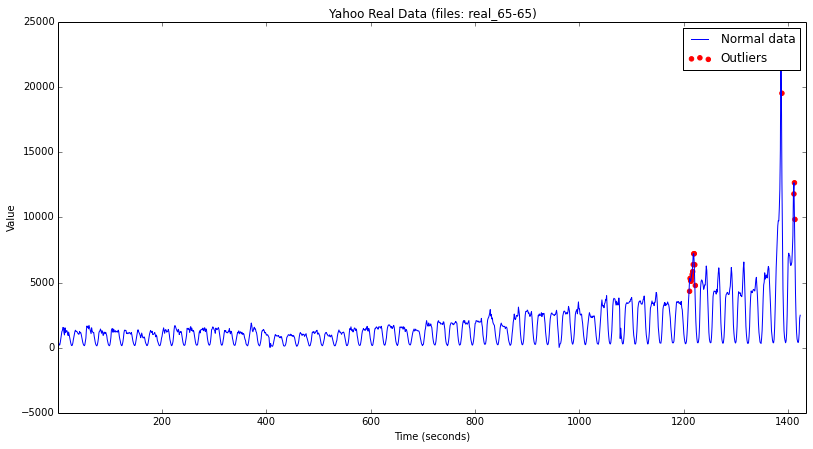

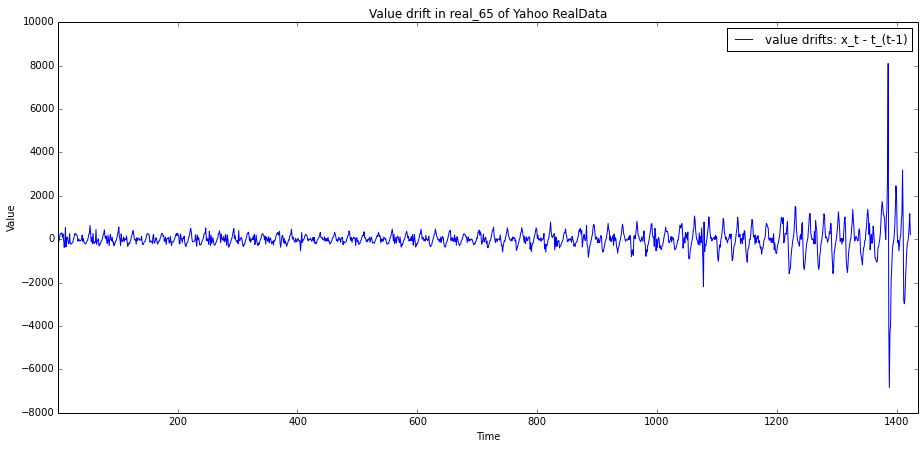

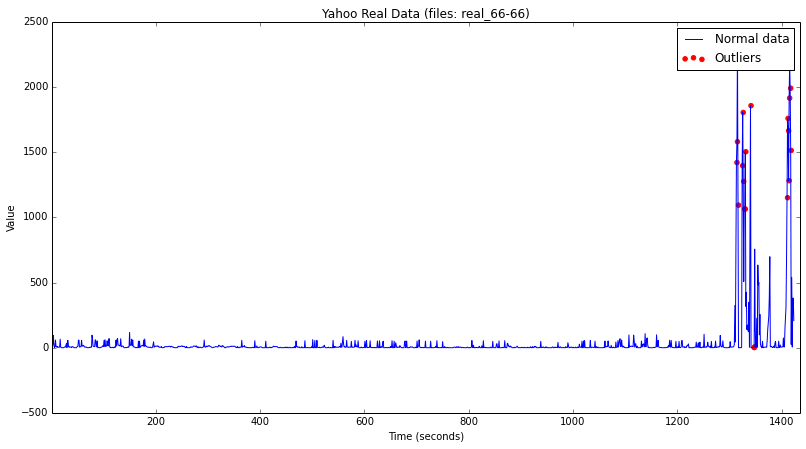

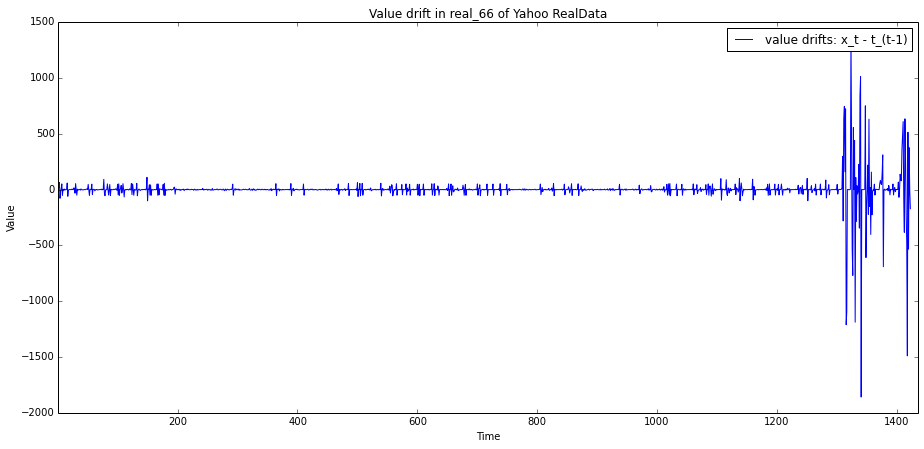

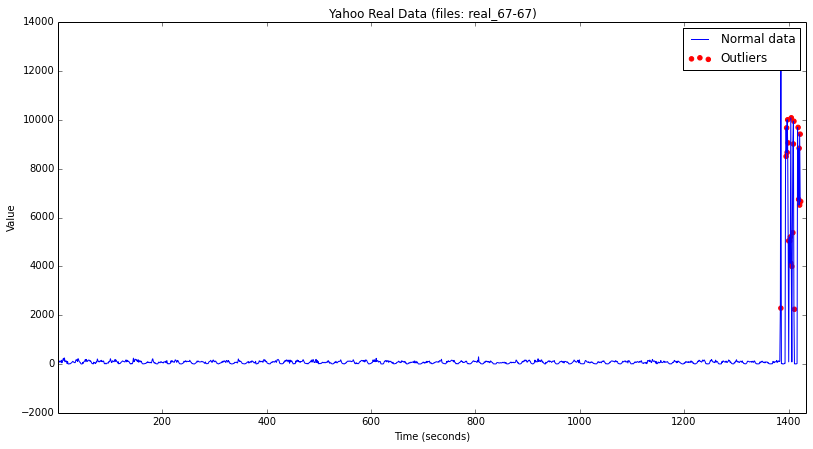

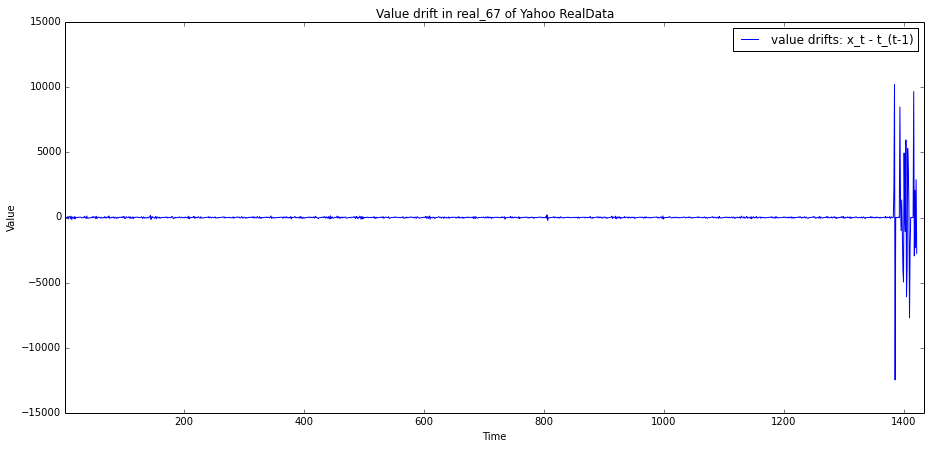

In [6]:
# block1: observe yahoo data to select proper data files for the next experiments 

def load_data_plot(st_file, ed_file):
    
    dta_folder="/home/guo/Downloads/ydata-labeled-time-series-anomalies-v1_0/A1Benchmark/real_"

    curr_cnt=0
    for i in range(st_file, ed_file):
        tmpdf= pd.read_csv( dta_folder + str(i) + ".csv")
        
        if (i-st_file) == 0 :
            tdf= tmpdf
        else:
            tmpdf.drop('timestamp', axis=1, inplace=True)
            tmp_col=  range( curr_cnt+1, curr_cnt + tmpdf.shape[0]+1 ) 
            tmpdf.insert(0, 'timestamp', tmp_col)
            tdf = tdf.append(tmpdf)
        curr_cnt = curr_cnt + tmpdf.shape[0]
    
    print "size of noisy data:", tdf.shape
    
    maxval= max(tdf['value'])
    minval= min(tdf['value'])
    outliers= tdf[ tdf['is_anomaly'] ==1  ]
    
    figure_size= ( 13.4,7)
    legend_font= 8.5
    fig = plt.figure()
    fig.set_size_inches( figure_size )

    plt.plot( list( tdf['value']), label='Normal data' )
    plt.scatter( list(outliers['timestamp']),list(outliers['value']), color='red',\
                label='Outliers'  )

    axes = plt.gca()
    axes.set_xlim([1, tdf.shape[0]+10])
#     axes.set_ylim([-10000,maxval+10000])
  
    plt.title('Yahoo Real Data ('+'files: real_'+str(st_file)+'-'+str(ed_file-1)+')')
    plt.ylabel('Value')
    plt.xlabel('Time (seconds)')
    plt.legend()
#     plt.legend(loc=0, ncol=5, mode="expand", borderaxespad=0., fontsize= legend_font , numpoints=1 )
    
    value_drift_observe( list(tdf['value']), 'real_'+str(st_file) )  
    
def value_drift_observe( ts, file_name ):
    valDrift =  [ ts[i+1]-ts[i] for i in range(len(ts)-1) ]
    
    fig = plt.figure()
    figure_size= ( 15.4,7)
    fig.set_size_inches( figure_size )

    axes = plt.gca()
    axes.set_xlim([1, len(ts)+10])
#     axes.set_ylim([-2000,maxval+2000])

    plt.plot( valDrift, label='value drifts: x_t - t_(t-1)' )
# plt.plot( list( clean_tdf['value']), color='g' )
# plt.scatter( list(outlier_tdf['timestamp']),list(outlier_tdf['value']), color='red',\
#              label='Outliers')
# plt.xticks([1,2,3,4,5], ['5','10','15','20','25'] )
# plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))


# axes.xaxis.set_ticks( ['5m', '10m', '15m','20m'] ) 
# axes.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.title('Value drift in ' + file_name + ' of Yahoo RealData')
    plt.ylabel('Value')
    plt.xlabel('Time')
# plt.legend( loc='upper left',fontsize=12 )
    plt.legend()
    
    

for i in range(67):

    file1=i+1
    file2=(i+1)+1
    
    load_data_plot(file1, file2)
    
    
    
    
    
# load_data_plot(61, 68)
